In [1]:
'''import packages''' 
import os 
import numpy as np 
import matplotlib.pyplot as plt 
import geopandas as gpd 
import pandas as pd 
from timeit import default_timer as timer 
'''import warnings warnings.filterwarnings('ignore') start = timer()'''

census = gpd.read_file('data/nz_census/2018-census-individual-part-1-total-new-zealand-by-statistic.shp')
census = census.replace(['C', -999, -998, '0', '..', 'Mainland'], 0)
census_2 = gpd.read_file('data/nz_census/2018-census-individual-part-2-total-new-zealand-by-statistic.shp')
census_3a = gpd.read_file('data/nz_census/2018-census-individual-part-3a-total-new-zealand-by-statisti.shp')
census_3b = gpd.read_file('data/nz_census/2018-census-individual-part-3b-total-new-zealand-by-statisti.shp')
'''census_m = census_2.merge(census_3a, on='SA12018_V1')
census_m = census.merge(census_3b, on='SA12018_V1')'''
regions = gpd.read_file('data/boundaries/regional_boundaries/REGC2017_HD_Clipped.shp')

#dict no slr 

hor_area= regions.iloc[7,4]
marl_area= regions.iloc[15,4]

hor_total = gpd.clip(census,hor_area)
mar_total = gpd.clip(census,marl_area)

'''auck_total = auck_total.merg(census_m, on='SA12018_V1')
welly_total = welly_total.merg(census_m, on='SA12018_V1')
cant_total = cant_total.merg(census_m, on='SA12018_V1')'''

mar_total = mar_total.sum()
hor_total = hor_total.sum()

regional_noslr_dict = {'Marlborough' : mar_total, 'Horizons' : hor_total}

#dict slr

regional_dict = {}
rc_names  = ['Marlborough', 'Horizons'] 
rc_names_abrv = ['Marlborough', 'horizons']



'''dictionary slr regional'''

for rc in range(0,2,1):
        regional_name = rc_names[rc]
        regional_name_abrv = rc_names_abrv[rc]
        slr_dict = {}
        for eslr in range(0,160,10):
            slr_data = gpd.read_file('data/clipped_census/'+ regional_name + '/' + regional_name_abrv + '_aep1pct_{}.shp'.format(eslr))
            slr_data = slr_data.replace(['C', -999, -998, '0', '..', 'Mainland', 'Inlet', 'Oceanic', 'Island'], 0)
            slr_data = slr_data.sum()
            slr_dict.update({'slr_{}'.format(eslr) : slr_data})
        regional_dict.update({regional_name : slr_dict})
    
''' general info'''

slr = []
for i in range(0, 160, 10):
    slr.append(i)
    
slr_str = []
for i in range(0, 160, 10):
    slr_str.append(str(i) + 'm')
    
years = [2006, 2013, 2018]

In [12]:
'''import packages''' 
import os 
import numpy as np 
import matplotlib.pyplot as plt 
import geopandas as gpd 
import pandas as pd 
from timeit import default_timer as timer 
'''import warnings warnings.filterwarnings('ignore') start = timer()'''

census = gpd.read_file('data/nz_census/2018-census-individual-part-1-total-new-zealand-by-statistic.shp')
census = census.replace(['C', -999, -998, '0', '..', 'Mainland'], 0)
census_2 = gpd.read_file('data/nz_census/2018-census-individual-part-2-total-new-zealand-by-statistic.shp')
census_3a = gpd.read_file('data/nz_census/2018-census-individual-part-3a-total-new-zealand-by-statisti.shp')
census_3b = gpd.read_file('data/nz_census/2018-census-individual-part-3b-total-new-zealand-by-statisti.shp')
'''census_m = census_2.merge(census_3a, on='SA12018_V1')
census_m = census.merge(census_3b, on='SA12018_V1')'''
regions = gpd.read_file('data/boundaries/regional_boundaries/REGC2017_HD_Clipped.shp')

#dict no slr 

hor_area= regions.iloc[7,4]
marl_area= regions.iloc[15,4]

hor_total = gpd.clip(census,hor_area)
mar_total = gpd.clip(census,marl_area)

'''auck_total = auck_total.merg(census_m, on='SA12018_V1')
welly_total = welly_total.merg(census_m, on='SA12018_V1')
cant_total = cant_total.merg(census_m, on='SA12018_V1')'''

mar_total = mar_total.sum()
hor_total = hor_total.sum()

regional_noslr_dict = {'Marlborough' : mar_total, 'Horizons' : hor_total}

#dict slr

regional_dict = {}
rc_names  = ['Marlborough', 'Horizons'] 
rc_names_abrv = ['Marlborough', 'horizons']



'''dictionary slr regional'''

for rc in range(0,2,1):
        regional_name = rc_names[rc]
        regional_name_abrv = rc_names_abrv[rc]
        slr_dict = {}
        for eslr in range(0,160,10):
            slr_data = gpd.read_file('data/clipped_census/'+ regional_name + '/' + regional_name_abrv + '_aep1pct_{}.shp'.format(eslr))
            slr_data = slr_data.replace(['C', -999, -998, '0', '..', 'Mainland', 'Inlet', 'Oceanic', 'Island'], 0)
            slr_data = slr_data.sum()
            slr_dict.update({'slr_{}'.format(eslr) : slr_data})
        regional_dict.update({regional_name : slr_dict})
    
''' general info'''

slr = []
for i in range(0, 160, 10):
    slr.append(i)
    
slr_str = []
for i in range(0, 160, 10):
    slr_str.append(str(i) + 'm')
    
years = [2006, 2013, 2018]

C:\Program Files\Anaconda3\envs\spatial\lib\site-packages\ipykernel_launcher.py:218: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


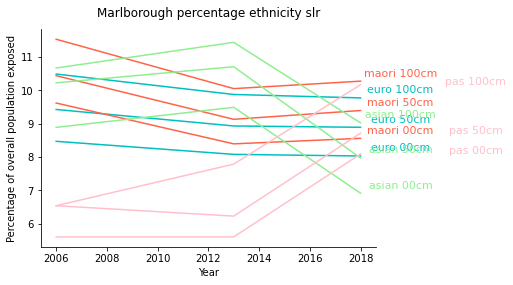

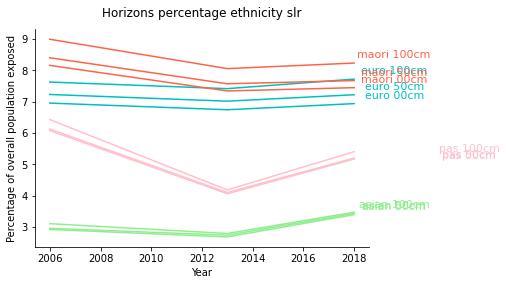

<Figure size 432x288 with 0 Axes>

In [13]:
#time progession - ethnicity

for i in range(0, 2, 1):
    rc = rc_names[i]
    v_euro_06 = [regional_dict[rc]['slr_{}'.format(i)]['C06_Ethnic'] for i in range(0,160,10)]
    v_euro_13 = [regional_dict[rc]['slr_{}'.format(i)]['C13_Ethnic'] for i in range(0,160,10)]
    v_euro_18 = [regional_dict[rc]['slr_{}'.format(i)]['C18_Ethnic'] for i in range(0,160,10)]
    v_maori_06 = [regional_dict[rc]['slr_{}'.format(i)]['C06_Ethn_1'] for i in range(0,160,10)]
    v_maori_13 = [regional_dict[rc]['slr_{}'.format(i)]['C13_Ethn_1'] for i in range(0,160,10)]
    v_maori_18 = [regional_dict[rc]['slr_{}'.format(i)]['C18_Ethn_1'] for i in range(0,160,10)]
    v_asian_06 = [regional_dict[rc]['slr_{}'.format(i)]['C06_Ethn_3'] for i in range(0,160,10)]
    v_asian_13 = [regional_dict[rc]['slr_{}'.format(i)]['C13_Ethn_3'] for i in range(0,160,10)]
    v_asian_18 = [regional_dict[rc]['slr_{}'.format(i)]['C18_Ethn_3'] for i in range(0,160,10)]
    v_pas_06 = [regional_dict[rc]['slr_{}'.format(i)]['C06_Ethn_2'] for i in range(0,160,10)]
    v_pas_13 = [regional_dict[rc]['slr_{}'.format(i)]['C13_Ethn_2'] for i in range(0,160,10)]
    v_pas_18 = [regional_dict[rc]['slr_{}'.format(i)]['C18_Ethn_2'] for i in range(0,160,10)]
    total_06 = [sum(x) for x in zip(v_euro_06, v_maori_06,v_asian_06, v_pas_06)]
    total_13 = [sum(x) for x in zip(v_euro_13, v_maori_13,v_asian_13, v_pas_13)]
    total_18 = [sum(x) for x in zip(v_euro_18, v_maori_18,v_asian_18, v_pas_18)]
    p_euro_06 = [((x/y)*100) for x, y in zip(v_euro_06, total_06)]
    p_euro_13 = [((x/y)*100) for x, y in zip(v_euro_13, total_13)]
    p_euro_18 = [((x/y)*100) for x, y in zip(v_euro_18, total_18)]
    p_maori_06 = [((x/y)*100) for x, y in zip(v_maori_06, total_06)]
    p_maori_13 = [((x/y)*100) for x, y in zip(v_maori_13, total_13)]
    p_maori_18 = [((x/y)*100) for x, y in zip(v_maori_18, total_18)]
    p_asian_06 = [((x/y)*100) for x, y in zip(v_asian_06, total_06)]
    p_asian_13 = [((x/y)*100) for x, y in zip(v_asian_13, total_13)]
    p_asian_18 = [((x/y)*100) for x, y in zip(v_asian_18, total_18)]
    p_pas_06 = [((x/y)*100) for x, y in zip(v_pas_06, total_06)]
    p_pas_13 = [((x/y)*100) for x, y in zip(v_pas_13, total_13)]
    p_pas_18 = [((x/y)*100) for x, y in zip(v_pas_18, total_18)]
    r_euro_06 = [regional_noslr_dict[rc]['C06_Ethnic'] for i in range(0, 160, 10)]
    r_euro_13 = [regional_noslr_dict[rc]['C13_Ethnic'] for i in range(0, 160, 10)]
    r_euro_18 = [regional_noslr_dict[rc]['C18_Ethnic'] for i in range(0, 160, 10)]
    r_maori_06 = [regional_noslr_dict[rc]['C06_Ethn_1'] for i in range(0, 160, 10)]
    r_maori_13 = [regional_noslr_dict[rc]['C13_Ethn_1'] for i in range(0, 160, 10)]
    r_maori_18 = [regional_noslr_dict[rc]['C18_Ethn_1'] for i in range(0, 160, 10)]
    r_asian_06 = [regional_noslr_dict[rc]['C06_Ethn_3'] for i in range(0, 160, 10)]
    r_asian_13 = [regional_noslr_dict[rc]['C13_Ethn_3'] for i in range(0, 160, 10)]
    r_asian_18 = [regional_noslr_dict[rc]['C18_Ethn_3'] for i in range(0, 160, 10)]
    r_pas_06 = [regional_noslr_dict[rc]['C06_Ethn_2'] for i in range(0, 160, 10)]
    r_pas_13 = [regional_noslr_dict[rc]['C13_Ethn_2'] for i in range(0, 160, 10)]
    r_pas_18 = [regional_noslr_dict[rc]['C18_Ethn_2'] for i in range(0, 160, 10)]
    po_euro_06 = [x/(y/100) for x, y in zip(v_euro_06, r_euro_06)]
    po_euro_13 = [x/(y/100) for x, y in zip(v_euro_13, r_euro_13)]
    po_euro_18 = [x/(y/100) for x, y in zip(v_euro_18, r_euro_18)]
    po_maori_06 = [x/(y/100) for x, y in zip(v_maori_06, r_maori_06)]
    po_maori_13 = [x/(y/100) for x, y in zip(v_maori_13, r_maori_13)]
    po_maori_18 = [x/(y/100) for x, y in zip(v_maori_18, r_maori_18)]
    po_asian_06 = [x/(y/100) for x, y in zip(v_asian_06, r_asian_06)]
    po_asian_13 = [x/(y/100) for x, y in zip(v_asian_13, r_asian_13)]
    po_asian_18 = [x/(y/100) for x, y in zip(v_asian_18, r_asian_18)]
    po_pas_06 = [x/(y/100) for x, y in zip(v_pas_06, r_pas_06)]
    po_pas_13 = [x/(y/100) for x, y in zip(v_pas_13, r_pas_13)]
    po_pas_18 = [x/(y/100) for x, y in zip(v_pas_18, r_pas_18)]

    '''euro'''
    v_euro_dict_time = {}
    p_euro_dict_time = {}
    po_euro_dict_time = {}

    v_euro_df = pd.DataFrame({'years' : years})
    v_euro_df.columns.name = rc
    p_euro_df = pd.DataFrame({'years' : years})
    p_euro_df.columns.name = rc
    po_euro_df = pd.DataFrame({'years' : years})
    po_euro_df.columns.name = rc

    for i in range(0, 16, 1):
        v_euro_time = []
        v_euro_time.append(v_euro_06[i])
        v_euro_time.append(v_euro_13[i])
        v_euro_time.append(v_euro_18[i])
        v_euro_dict_time.update({'slr_{}0'.format(i) : v_euro_time})
        p_euro_time = []
        p_euro_time.append(p_euro_06[i])
        p_euro_time.append(p_euro_13[i])
        p_euro_time.append(p_euro_18[i])
        p_euro_dict_time.update({'slr_{}0'.format(i) : p_euro_time})
        po_euro_time = []
        po_euro_time.append(po_euro_06[i])
        po_euro_time.append(po_euro_13[i])
        po_euro_time.append(po_euro_18[i])
        po_euro_dict_time.update({'slr_{}0'.format(i) : po_euro_time})
        if i == 0 or i == 5 or i == 10:
            v_euro_df['slr_{}0'.format(i)] = v_euro_time
            po_euro_df['slr_{}0'.format(i)] = [round(num, 1) for num in po_euro_time]


    '''maori'''
    v_maori_dict_time = {}
    p_maori_dict_time = {}
    po_maori_dict_time = {}


    v_maori_df = pd.DataFrame({'years' : years})
    v_maori_df.columns.name = rc
    po_maori_df = pd.DataFrame({'years' : years})
    po_maori_df.columns.name = rc

    for i in range(0, 16, 1):
        v_maori_time = []
        v_maori_time.append(v_maori_06[i])
        v_maori_time.append(v_maori_13[i])
        v_maori_time.append(v_maori_18[i])
        v_maori_dict_time.update({'slr_{}0'.format(i) : v_maori_time})
        p_maori_time = []
        p_maori_time.append(p_maori_06[i])
        p_maori_time.append(p_maori_13[i])
        p_maori_time.append(p_maori_18[i])
        p_maori_dict_time.update({'slr_{}0'.format(i) : p_maori_time})
        po_maori_time = []
        po_maori_time.append(po_maori_06[i])
        po_maori_time.append(po_maori_13[i])
        po_maori_time.append(po_maori_18[i])
        po_maori_dict_time.update({'slr_{}0'.format(i) : po_maori_time})
        if i == 0 or i == 5 or i == 10:
            v_maori_df['slr_{}0'.format(i)] = v_maori_time
            po_maori_df['slr_{}0'.format(i)] = [round(num, 1) for num in po_maori_time]

    '''asian'''
    v_asian_dict_time = {}
    p_asian_dict_time = {}
    po_asian_dict_time = {}

    v_asian_df = pd.DataFrame({'years' : years})
    v_asian_df.columns.name = rc
    p_asian_df = pd.DataFrame({'years' : years})
    p_asian_df.columns.name = rc
    po_asian_df = pd.DataFrame({'years' : years})
    po_asian_df.columns.name = rc

    for i in range(0, 16, 1):
        v_asian_time = []
        v_asian_time.append(v_asian_06[i])
        v_asian_time.append(v_asian_13[i])
        v_asian_time.append(v_asian_18[i])
        v_asian_dict_time.update({'slr_{}0'.format(i) : v_asian_time})
        p_asian_time = []
        p_asian_time.append(p_asian_06[i])
        p_asian_time.append(p_asian_13[i])
        p_asian_time.append(p_asian_18[i])
        p_asian_dict_time.update({'slr_{}0'.format(i) : p_asian_time})
        po_asian_time = []
        po_asian_time.append(po_asian_06[i])
        po_asian_time.append(po_asian_13[i])
        po_asian_time.append(po_asian_18[i])
        po_asian_dict_time.update({'slr_{}0'.format(i) : po_asian_time})
        if i == 0 or i == 5 or i == 10:
            v_asian_df['slr_{}0'.format(i)] = v_asian_time
            po_asian_df['slr_{}0'.format(i)] = [round(num, 1) for num in po_asian_time]


    '''pas'''
    v_pas_dict_time = {}
    p_pas_dict_time = {}
    po_pas_dict_time = {}

    v_pas_df = pd.DataFrame({'years' : years})
    v_pas_df.columns.name = rc
    po_pas_df = pd.DataFrame({'years' : years})
    po_pas_df.columns.name = rc

    for i in range(0, 16, 1):
        v_pas_time = []
        v_pas_time.append(v_pas_06[i])
        v_pas_time.append(v_pas_13[i])
        v_pas_time.append(v_pas_18[i])
        v_pas_dict_time.update({'slr_{}0'.format(i) : v_pas_time})
        p_pas_time = []
        p_pas_time.append(p_pas_06[i])
        p_pas_time.append(p_pas_13[i])
        p_pas_time.append(p_pas_18[i])
        p_pas_dict_time.update({'slr_{}0'.format(i) : p_pas_time})
        po_pas_time = []
        po_pas_time.append(po_pas_06[i])
        po_pas_time.append(po_pas_13[i])
        po_pas_time.append(po_pas_18[i])
        po_pas_dict_time.update({'slr_{}0'.format(i) : po_pas_time})
        if i == 0 or i == 5 or i == 10:
            v_pas_df['slr_{}0'.format(i)] = v_pas_time
            po_pas_df['slr_{}0'.format(i)] = [round(num, 1) for num in po_pas_time]


    '''make all this data useful and orderly'''
    ethnicity_dict_time = {'euro_value' : v_euro_dict_time, 'euro_percentage' : p_euro_dict_time, 'euro_po' : po_euro_dict_time, 'maori_value' : v_maori_dict_time, 'maori_percentage' : p_maori_dict_time, 'maori_po' : po_maori_dict_time, 'asian_value' : v_asian_dict_time, 'asian_percentage' : p_asian_dict_time, 'asian_po' : po_asian_dict_time, 'pas_value' : v_pas_dict_time, 'pas_percentage' : p_pas_dict_time, 'pas_po' : po_pas_dict_time,}
    years = [2006, 2013, 2018]
    title_offset = 1.03
    colour_3 = 'tomato'
    colour_4 = 'lightgreen'  



    '''plot slr increase percentage of overall population'''
    for i in range(0, 11, 5):
        x = 'slr_'+ str(i) + '0'
        y = "euro " + str(i) + "0cm"
        plt.plot(years, ethnicity_dict_time['euro_po'][x], label=y, color="c")
        plt.annotate(y, (2018, ethnicity_dict_time['euro_po'][x][2]), textcoords="offset points", xytext=(40,5), fontsize=11, ha='center', color='c')
    for i in range(0, 11, 5):
        x = 'slr_'+ str(i) + '0'
        y = "maori " + str(i) + "0cm"
        plt.plot(years, ethnicity_dict_time['maori_po'][x], label=y, color=colour_3)
        plt.annotate(y, (2018, ethnicity_dict_time['maori_po'][x][2]), textcoords="offset points", xytext=(40,5), fontsize=11, ha='center', color=colour_3)
    for i in range(0, 11, 5):
        x = 'slr_'+ str(i) + '0'
        y = "asian " + str(i) + "0cm"
        plt.plot(years, ethnicity_dict_time['asian_po'][x], label=y, color=colour_4)
        plt.annotate(y, (2018, ethnicity_dict_time['asian_po'][x][2]), textcoords="offset points", xytext=(40,5), fontsize=11, ha='center', color=colour_4)
    for i in range(0, 11, 5):
        x = 'slr_'+ str(i) + '0'
        y = "pas " + str(i) + "0cm"
        plt.plot(years, ethnicity_dict_time['pas_po'][x], label=y, color="pink")
        plt.annotate(y, (2018, ethnicity_dict_time['pas_po'][x][2]), textcoords="offset points", xytext=(115,0), fontsize=11, ha='center', color='pink')
        plt.xlabel('Year')
        plt.ylabel('Percentage of overall population exposed')
        plt.title(rc + ' percentage ethnicity slr', y=title_offset)
        ax = plt.subplot(111)
        ax.spines["right"].set_visible(False)
        ax.spines["top"].set_visible(False)
    plt.savefig('results/ethnicity_time/' + rc + '_percentageoverall_ethnicity.png')
    plt.show()
    plt.clf()

Marlborough


C:\Program Files\Anaconda3\envs\spatial\lib\site-packages\ipykernel_launcher.py:114: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


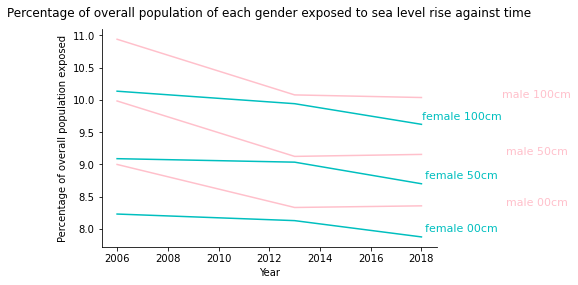

Horizons


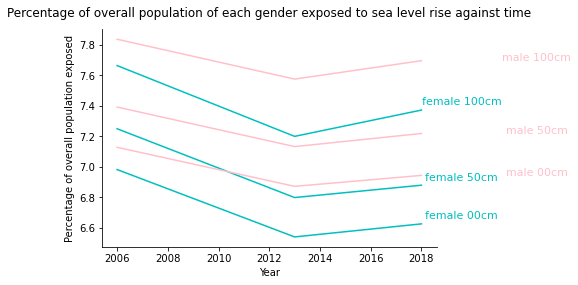

In [14]:
#time progression - gender

'''collate relevent data'''

for rc in rc_names:
    print(rc)
    '''collate relevent data'''
    v_female_06 = [regional_dict[rc]['slr_{}'.format(i)]['C06_Sex_Fe'] for i in range(0,160,10)]
    v_female_13 = [regional_dict[rc]['slr_{}'.format(i)]['C13_Sex_Fe'] for i in range(0,160,10)]
    v_female_18 = [regional_dict[rc]['slr_{}'.format(i)]['C18_Sex_Fe'] for i in range(0,160,10)]
    v_male_06 = [regional_dict[rc]['slr_{}'.format(i)]['C06_Sex_Ma'] for i in range(0,160,10)]
    v_male_13 = [regional_dict[rc]['slr_{}'.format(i)]['C13_Sex_Ma'] for i in range(0,160,10)]
    v_male_18 = [regional_dict[rc]['slr_{}'.format(i)]['C18_Sex_Ma'] for i in range(0,160,10)]
    r_female_06 = [regional_noslr_dict[rc]['C06_Sex_Fe'] for i in range(0, 160, 10)]
    r_female_13 = [regional_noslr_dict[rc]['C13_Sex_Fe'] for i in range(0, 160, 10)]
    r_female_18 = [regional_noslr_dict[rc]['C18_Sex_Fe'] for i in range(0, 160, 10)]
    r_male_06 = [regional_noslr_dict[rc]['C06_Sex_Ma'] for i in range(0, 160, 10)]
    r_male_13 = [regional_noslr_dict[rc]['C13_Sex_Ma'] for i in range(0, 160, 10)]
    r_male_18 = [regional_noslr_dict[rc]['C18_Sex_Ma'] for i in range(0, 160, 10)]
    po_female_06 = [x/(y/100) for x, y in zip(v_female_06, r_female_06)]
    po_female_13 = [x/(y/100) for x, y in zip(v_female_13, r_female_13)]
    po_female_18 = [x/(y/100) for x, y in zip(v_female_18, r_female_18)]
    po_male_06 = [x/(y/100) for x, y in zip(v_male_06, r_male_06)]
    po_male_13 = [x/(y/100) for x, y in zip(v_male_13, r_male_13)]
    po_male_18 = [x/(y/100) for x, y in zip(v_male_18, r_male_18)]

    '''female'''
    v_fem_dict_time = {}
    p_fem_dict_time = {}
    pc_fem_dict_time = {}
    po_fem_dict_time = {}
    
    v_fem_df = pd.DataFrame({'years' : years})
    v_fem_df.columns.name = rc
    po_fem_df = pd.DataFrame({'years' : years})
    po_fem_df.columns.name = rc
    
    for i in range(0, 16, 1):
        v_fem_time = []
        v_fem_time.append(v_female_06[i])
        v_fem_time.append(v_female_13[i])
        v_fem_time.append(v_female_18[i])
        v_fem_dict_time.update({'slr_{}0'.format(i) : v_fem_time})
        po_fem_time = []
        po_fem_time.append(po_female_06[i])
        po_fem_time.append(po_female_13[i])
        po_fem_time.append(po_female_18[i])
        po_fem_dict_time.update({'slr_{}0'.format(i) : po_fem_time})
        if i == 0 or i == 5 or i == 10:
            v_fem_df['slr_{}0'.format(i)] = v_fem_time
            po_fem_df['slr_{}0'.format(i)] = [round(num, 1) for num in po_fem_time]
        
       
    '''male'''
    v_mal_dict_time = {}
    po_mal_dict_time = {}
    
    
    v_mal_df = pd.DataFrame({'years' : years})
    v_mal_df.columns.name = rc
    po_mal_df = pd.DataFrame({'years' : years})
    po_mal_df.columns.name = rc
    
    for i in range(0, 16, 1):
        v_mal_time = []
        v_mal_time.append(v_male_06[i])
        v_mal_time.append(v_male_13[i])
        v_mal_time.append(v_male_18[i])
        v_mal_dict_time.update({'slr_{}0'.format(i) : v_mal_time})
        po_mal_time = []
        po_mal_time.append(po_male_06[i])
        po_mal_time.append(po_male_13[i])
        po_mal_time.append(po_male_18[i])
        po_mal_dict_time.update({'slr_{}0'.format(i) : po_mal_time})
        if i == 0 or i == 5 or i == 10:
            v_mal_df['slr_{}0'.format(i)] = v_mal_time
            po_mal_df['slr_{}0'.format(i)] = [round(num, 1) for num in po_mal_time]
    
    '''values'''
    '''fem_all_df = pd.concat([v_fem_df, po_fem_df], axis=1)
    fem_all_df.loc[-1] = ['Female', '', '', '', '', '']
    fem_all_df.index = euro_all_df.index + 1
    fem_all_df.sort_index(inplace=True)
    
    m_all_df = pd.concat([vs_mal_df_all, pos_mal_df_all], axis=1)
    m_all_df.loc[-1] = ['Male', '', '', '', '', '']
    m_all_df.index = euro_all_df.index + 1
    m_all_df.sort_index(inplace=True)

    gen_all_time_df = pd.concat([fem_all_df, m_all_df], axis=0)
    gen_all_time_df.to_csv('results/gender_time/' + rc +  '_all.csv', mode='a')'''


    gender_dict_time = {'female_value' : v_fem_dict_time, 'female_po' : po_fem_dict_time, 'male_value' : v_mal_dict_time, 'male_po' : po_mal_dict_time}
    years = [2006, 2013, 2018]
    title_offset = 1.03



    '''plot slr increase percentage of overall population'''
    for i in range(0, 11, 5):
        x = 'slr_'+ str(i) + '0'
        y = "female " + str(i) + "0cm"
        plt.plot(years, gender_dict_time['female_po'][x], label=y, color="c")
        plt.annotate(y, (2018, gender_dict_time['female_po'][x][2]), textcoords="offset points", xytext=(40,5), fontsize=11, ha='center', color='c')
    for i in range(0, 11, 5):
        x = 'slr_'+ str(i) + '0'
        y = "male " + str(i) + "0cm"
        plt.plot(years, gender_dict_time['male_po'][x], label=y, color="pink")
        plt.annotate(y, (2018, gender_dict_time['male_po'][x][2]), textcoords="offset points", xytext=(115,0), fontsize=11, ha='center', color='pink')
        plt.xlabel('Year')
        plt.ylabel('Percentage of overall population exposed')
        plt.title('Percentage of overall population of each gender exposed to sea level rise against time', y=title_offset)
        ax = plt.subplot(111)
        ax.spines["right"].set_visible(False)
        ax.spines["top"].set_visible(False)
    plt.show()
    


Marlborough


C:\Program Files\Anaconda3\envs\spatial\lib\site-packages\ipykernel_launcher.py:243: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


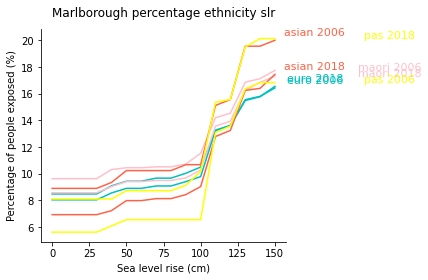

Horizons


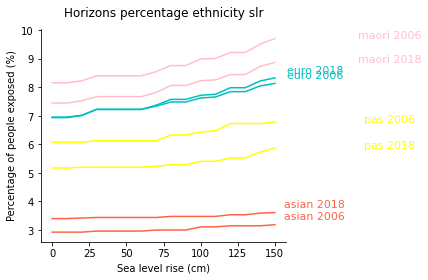

<Figure size 432x288 with 0 Axes>

In [15]:
#slr progression - ethicity


for i in range(0, 2, 1):
    rc = rc_names[i]
    print(rc)
    '''collate relevent data'''
    v_euro_06 = [regional_dict[rc]['slr_{}'.format(i)]['C06_Ethnic'] for i in range(0,160,10)]
    v_euro_13 = [regional_dict[rc]['slr_{}'.format(i)]['C13_Ethnic'] for i in range(0,160,10)]
    v_euro_18 = [regional_dict[rc]['slr_{}'.format(i)]['C18_Ethnic'] for i in range(0,160,10)]
    v_maori_06 = [regional_dict[rc]['slr_{}'.format(i)]['C06_Ethn_1'] for i in range(0,160,10)]
    v_maori_13 = [regional_dict[rc]['slr_{}'.format(i)]['C13_Ethn_1'] for i in range(0,160,10)]
    v_maori_18 = [regional_dict[rc]['slr_{}'.format(i)]['C18_Ethn_1'] for i in range(0,160,10)]
    v_asian_06 = [regional_dict[rc]['slr_{}'.format(i)]['C06_Ethn_3'] for i in range(0,160,10)]
    v_asian_13 = [regional_dict[rc]['slr_{}'.format(i)]['C13_Ethn_3'] for i in range(0,160,10)]
    v_asian_18 = [regional_dict[rc]['slr_{}'.format(i)]['C18_Ethn_3'] for i in range(0,160,10)]
    v_pas_06 = [regional_dict[rc]['slr_{}'.format(i)]['C06_Ethn_2'] for i in range(0,160,10)]
    v_pas_13 = [regional_dict[rc]['slr_{}'.format(i)]['C13_Ethn_2'] for i in range(0,160,10)]
    v_pas_18 = [regional_dict[rc]['slr_{}'.format(i)]['C18_Ethn_2'] for i in range(0,160,10)]
    total_06 = [sum(x) for x in zip(v_euro_06, v_maori_06,v_asian_06, v_pas_06)]
    total_13 = [sum(x) for x in zip(v_euro_13, v_maori_13,v_asian_13, v_pas_13)]
    total_18 = [sum(x) for x in zip(v_euro_18, v_maori_18,v_asian_18, v_pas_18)]
    p_euro_06 = [((x/y)*100) for x, y in zip(v_euro_06, total_06)]
    p_euro_13 = [((x/y)*100) for x, y in zip(v_euro_13, total_13)]
    p_euro_18 = [((x/y)*100) for x, y in zip(v_euro_18, total_18)]
    p_maori_06 = [((x/y)*100) for x, y in zip(v_maori_06, total_06)]
    p_maori_13 = [((x/y)*100) for x, y in zip(v_maori_13, total_13)]
    p_maori_18 = [((x/y)*100) for x, y in zip(v_maori_18, total_18)]
    p_asian_06 = [((x/y)*100) for x, y in zip(v_asian_06, total_06)]
    p_asian_13 = [((x/y)*100) for x, y in zip(v_asian_13, total_13)]
    p_asian_18 = [((x/y)*100) for x, y in zip(v_asian_18, total_18)]
    p_pas_06 = [((x/y)*100) for x, y in zip(v_pas_06, total_06)]
    p_pas_13 = [((x/y)*100) for x, y in zip(v_pas_13, total_13)]
    p_pas_18 = [((x/y)*100) for x, y in zip(v_pas_18, total_18)]
    r_euro_06 = [regional_noslr_dict[rc]['C06_Ethnic'] for i in range(0, 160, 10)]
    r_euro_13 = [regional_noslr_dict[rc]['C13_Ethnic'] for i in range(0, 160, 10)]    
    r_euro_18 = [regional_noslr_dict[rc]['C18_Ethnic'] for i in range(0, 160, 10)]
    r_maori_06 = [regional_noslr_dict[rc]['C06_Ethn_1'] for i in range(0, 160, 10)]
    r_maori_13 = [regional_noslr_dict[rc]['C13_Ethn_1'] for i in range(0, 160, 10)]
    r_maori_18 = [regional_noslr_dict[rc]['C18_Ethn_1'] for i in range(0, 160, 10)]
    r_asian_06 = [regional_noslr_dict[rc]['C06_Ethn_3'] for i in range(0, 160, 10)]
    r_asian_13 = [regional_noslr_dict[rc]['C13_Ethn_3'] for i in range(0, 160, 10)]
    r_asian_18 = [regional_noslr_dict[rc]['C18_Ethn_3'] for i in range(0, 160, 10)]
    r_pas_06 = [regional_noslr_dict[rc]['C06_Ethn_2'] for i in range(0, 160, 10)]
    r_pas_13 = [regional_noslr_dict[rc]['C13_Ethn_2'] for i in range(0, 160, 10)]
    r_pas_18 = [regional_noslr_dict[rc]['C18_Ethn_2'] for i in range(0, 160, 10)]
    po_euro_06 = [x/(y/100) for x, y in zip(v_euro_06, r_euro_06)]
    po_euro_13 = [x/(y/100) for x, y in zip(v_euro_13, r_euro_13)]
    po_euro_18 = [x/(y/100) for x, y in zip(v_euro_18, r_euro_18)]
    po_maori_06 = [x/(y/100) for x, y in zip(v_maori_06, r_maori_06)]
    po_maori_13 = [x/(y/100) for x, y in zip(v_maori_13, r_maori_13)]
    po_maori_18 = [x/(y/100) for x, y in zip(v_maori_18, r_maori_18)]
    po_asian_06 = [x/(y/100) for x, y in zip(v_asian_06, r_asian_06)]
    po_asian_13 = [x/(y/100) for x, y in zip(v_asian_13, r_asian_13)]
    po_asian_18 = [x/(y/100) for x, y in zip(v_asian_18, r_asian_18)]
    po_pas_06 = [x/(y/100) for x, y in zip(v_pas_06, r_pas_06)]
    po_pas_13 = [x/(y/100) for x, y in zip(v_pas_13, r_pas_13)]
    po_pas_18 = [x/(y/100) for x, y in zip(v_pas_18, r_pas_18)]

    '''make all this plotting useful and orderly'''
    title_offset = 1.03
    male_ad_offset = (115, 0)

    '''creating values'''
    slr_short = [0, 50, 100, 150]
    vs_euro_df_06 = pd.DataFrame({'slr' : slr_short})
    vs_euro_df_06.columns.name = rc
    vs_euro_df_13 = pd.DataFrame({})
    vs_euro_df_13.columns.name = rc
    vs_euro_df_18 = pd.DataFrame({})
    vs_euro_df_18.columns.name = rc
    vs_maori_df_06 = pd.DataFrame({'slr' : slr_short})
    vs_maori_df_06.columns.name = rc
    vs_maori_df_13 = pd.DataFrame({})
    vs_maori_df_13.columns.name = rc
    vs_maori_df_18 = pd.DataFrame({})
    vs_maori_df_18.columns.name = rc
    vs_asian_df_06 = pd.DataFrame({'slr' : slr_short})
    vs_asian_df_06.columns.name = rc
    vs_asian_df_13 = pd.DataFrame({})
    vs_asian_df_13.columns.name = rc
    vs_asian_df_18 = pd.DataFrame({})
    vs_asian_df_18.columns.name = rc
    vs_pas_df_06 = pd.DataFrame({'slr' : slr_short})
    vs_pas_df_06.columns.name = rc
    vs_pas_df_13 = pd.DataFrame({})
    vs_pas_df_13.columns.name = rc
    vs_pas_df_18 = pd.DataFrame({})
    vs_pas_df_18.columns.name = rc
    pos_euro_df_06 = pd.DataFrame({})
    pos_euro_df_06.columns.name = rc
    pos_euro_df_13 = pd.DataFrame({})
    pos_euro_df_13.columns.name = rc
    pos_euro_df_18 = pd.DataFrame({})
    pos_euro_df_18.columns.name = rc
    pos_maori_df_06 = pd.DataFrame({})
    pos_maori_df_06.columns.name = rc
    pos_maori_df_13 = pd.DataFrame({})
    pos_maori_df_13.columns.name = rc
    pos_maori_df_18 = pd.DataFrame({})
    pos_maori_df_18.columns.name = rc
    pos_asian_df_06 = pd.DataFrame({})
    pos_asian_df_06.columns.name = rc
    pos_asian_df_13 = pd.DataFrame({})
    pos_asian_df_13.columns.name = rc
    pos_asian_df_18 = pd.DataFrame({})
    pos_asian_df_18.columns.name = rc
    pos_pas_df_06 = pd.DataFrame({})
    pos_pas_df_06.columns.name = rc
    pos_pas_df_13 = pd.DataFrame({})
    pos_pas_df_13.columns.name = rc
    pos_pas_df_18 = pd.DataFrame({})
    pos_pas_df_18.columns.name = rc

    vs_euro_l1_06 = []
    vs_euro_l1_13 = []
    vs_euro_l1_18 = []
    pos_euro_l1_06 = []
    pos_euro_l1_13 = []
    pos_euro_l1_18 = []
    vs_maori_l1_06 = []
    vs_maori_l1_13 = []
    vs_maori_l1_18 = []
    pos_maori_l1_06 = []
    pos_maori_l1_13 = []
    pos_maori_l1_18 = []
    vs_asian_l1_06 = []
    vs_asian_l1_13 = []
    vs_asian_l1_18 = []
    pos_asian_l1_06 = []
    pos_asian_l1_13 = []
    pos_asian_l1_18 = []
    vs_pas_l1_06 = []
    vs_pas_l1_13 = []
    vs_pas_l1_18 = []
    pos_pas_l1_06 = []
    pos_pas_l1_13 = []
    pos_pas_l1_18 = []

    for i in range(0, 16, 5):
        vs_euro_l2_06 = v_euro_06[i]
        vs_euro_l1_06.append(vs_euro_l2_06)
        vs_euro_l2_13 = v_euro_13[i]
        vs_euro_l1_13.append(vs_euro_l2_13)
        vs_euro_l2_18 = v_euro_18[i]
        vs_euro_l1_18.append(vs_euro_l2_18)
        pos_euro_l2_06 = po_euro_06[i]
        pos_euro_l1_06.append(pos_euro_l2_06)
        pos_euro_l2_13 = po_euro_13[i]
        pos_euro_l1_13.append(pos_euro_l2_13)
        pos_euro_l2_18 = po_euro_18[i]
        pos_euro_l1_18.append(pos_euro_l2_18)
        vs_maori_l2_06 = v_maori_06[i]
        vs_maori_l1_06.append(vs_maori_l2_06)
        vs_maori_l2_13 = v_maori_13[i]
        vs_maori_l1_13.append(vs_maori_l2_13)
        vs_maori_l2_18 = v_maori_18[i]
        vs_maori_l1_18.append(vs_maori_l2_18)
        pos_maori_l2_06 = po_maori_06[i]
        pos_maori_l1_06.append(pos_maori_l2_06)
        pos_maori_l2_13 = po_maori_13[i]
        pos_maori_l1_13.append(pos_maori_l2_13)
        pos_maori_l2_18 = po_maori_18[i]
        pos_maori_l1_18.append(pos_maori_l2_18)
        vs_asian_l2_06 = v_asian_06[i]
        vs_asian_l1_06.append(vs_asian_l2_06)
        vs_asian_l2_13 = v_asian_13[i]
        vs_asian_l1_13.append(vs_asian_l2_13)
        vs_asian_l2_18 = v_asian_18[i]
        vs_asian_l1_18.append(vs_asian_l2_18)
        pos_asian_l2_06 = po_asian_06[i]
        pos_asian_l1_06.append(pos_asian_l2_06)
        pos_asian_l2_13 = po_asian_13[i]
        pos_asian_l1_13.append(pos_asian_l2_13)
        pos_asian_l2_18 = po_asian_18[i]
        pos_asian_l1_18.append(pos_asian_l2_18)
        vs_pas_l2_06 = v_pas_06[i]
        vs_pas_l1_06.append(vs_pas_l2_06)
        vs_pas_l2_13 = v_pas_13[i]
        vs_pas_l1_13.append(vs_pas_l2_13)
        vs_pas_l2_18 = v_pas_18[i]
        vs_pas_l1_18.append(vs_pas_l2_18)
        pos_pas_l2_06 = po_pas_06[i]
        pos_pas_l1_06.append(pos_pas_l2_06)
        pos_pas_l2_13 = po_pas_13[i]
        pos_pas_l1_13.append(pos_pas_l2_13)
        pos_pas_l2_18 = po_pas_18[i]
        pos_pas_l1_18.append(pos_pas_l2_18)
    vs_euro_df_06['2006'] = [round(num, 1) for num in vs_euro_l1_06]
    vs_euro_df_13['2013'] = [round(num, 1) for num in vs_euro_l1_13]
    vs_euro_df_18['2018'] = [round(num, 1) for num in vs_euro_l1_18]
    pos_euro_df_06['2006'] = [round(num, 1) for num in pos_euro_l1_06]
    pos_euro_df_13['2013'] = [round(num, 1) for num in pos_euro_l1_13]
    pos_euro_df_18['2018'] = [round(num, 1) for num in pos_euro_l1_18]
    vs_maori_df_06['2006'] = [round(num, 1) for num in vs_maori_l1_06]
    vs_maori_df_13['2013'] = [round(num, 1) for num in vs_maori_l1_13]
    vs_maori_df_18['2018'] = [round(num, 1) for num in vs_maori_l1_18]
    pos_maori_df_06['2006'] = [round(num, 1) for num in pos_maori_l1_06]
    pos_maori_df_13['2013'] = [round(num, 1) for num in pos_maori_l1_13]
    pos_maori_df_18['2018'] = [round(num, 1) for num in pos_maori_l1_18]
    vs_asian_df_06['2006'] = [round(num, 1) for num in vs_asian_l1_06]
    vs_asian_df_13['2013'] = [round(num, 1) for num in vs_asian_l1_13]
    vs_asian_df_18['2018'] = [round(num, 1) for num in vs_asian_l1_18]
    pos_asian_df_06['2006'] = [round(num, 1) for num in pos_asian_l1_06]
    pos_asian_df_13['2013'] = [round(num, 1) for num in pos_asian_l1_13]
    pos_asian_df_18['2018'] = [round(num, 1) for num in pos_asian_l1_18]
    vs_pas_df_06['2006'] = [round(num, 1) for num in vs_pas_l1_06]
    vs_pas_df_13['2013'] = [round(num, 1) for num in vs_pas_l1_13]
    vs_pas_df_18['2018'] = [round(num, 1) for num in vs_pas_l1_18]
    pos_pas_df_06['2006'] = [round(num, 1) for num in pos_pas_l1_06]
    pos_pas_df_13['2013'] = [round(num, 1) for num in pos_pas_l1_13]
    pos_pas_df_18['2018'] = [round(num, 1) for num in pos_pas_l1_18]

    vs_euro_df_all = pd.concat([vs_euro_df_06, vs_euro_df_13, vs_euro_df_18], axis=1)
    pos_euro_df_all = pd.concat([pos_euro_df_06, pos_euro_df_13, pos_euro_df_18], axis=1)
    vs_maori_df_all = pd.concat([vs_maori_df_06, vs_maori_df_13, vs_maori_df_18], axis=1)
    pos_maori_df_all = pd.concat([pos_maori_df_06, pos_maori_df_13, pos_maori_df_18], axis=1)
    vs_asian_df_all = pd.concat([vs_asian_df_06, vs_asian_df_13, vs_asian_df_18], axis=1)
    pos_asian_df_all = pd.concat([pos_asian_df_06, pos_asian_df_13, pos_asian_df_18], axis=1)
    vs_pas_df_all = pd.concat([vs_pas_df_06, vs_pas_df_13, vs_pas_df_18], axis=1)
    pos_pas_df_all = pd.concat([pos_pas_df_06, pos_pas_df_13, pos_pas_df_18], axis=1)

    '''plot slr percentage overall '''
    plt.plot(slr, po_euro_06, label="euro 06", color="c")
    plt.annotate('euro 2006', (150, po_euro_06[15]), textcoords="offset points", xytext=(40,5), fontsize=11, ha='center', color='c')
    plt.plot(slr, po_euro_18, label="euro 18", color="c")
    plt.annotate('euro 2018', (150, po_euro_18[15]), textcoords="offset points", xytext=(40,5), fontsize=11, ha='center', color='c')
    plt.plot(slr, po_maori_06, label="maori 06", color="pink")
    plt.annotate('maori 2006', (150, po_maori_06[15]), textcoords="offset points", xytext=male_ad_offset, fontsize=11, ha='center', color='pink')
    plt.plot(slr, po_maori_18, label="maori 18", color="pink")
    plt.annotate('maori 2018', (150, po_maori_18[15]), textcoords="offset points", xytext=male_ad_offset, fontsize=11, ha='center', color='pink')
    plt.plot(slr, po_asian_06, label="asian 06", color="tomato")
    plt.annotate('asian 2006', (150, po_asian_06[15]), textcoords="offset points", xytext=(40,5), fontsize=11, ha='center', color='tomato')
    plt.plot(slr, po_asian_18, label="asian 18", color="tomato")
    plt.annotate('asian 2018', (150, po_asian_18[15]), textcoords="offset points", xytext=(40,5), fontsize=11, ha='center', color='tomato')
    plt.plot(slr, po_pas_06, label="pas 06", color="yellow")
    plt.annotate('pas 2006', (150, po_pas_06[15]), textcoords="offset points", xytext=male_ad_offset, fontsize=11, ha='center', color='yellow')
    plt.plot(slr, po_pas_18, label="pas 18", color="yellow")
    plt.annotate('pas 2018', (150, po_pas_18[15]), textcoords="offset points", xytext=male_ad_offset, fontsize=11, ha='center', color='yellow')
    plt.xlabel('Sea level rise (cm)')
    plt.ylabel('Percentage of people exposed (%)')
    plt.title(rc + ' percentage ethnicity slr', y=title_offset)
    ax = plt.subplot(111)
    ax.spines["right"].set_visible(False)
    ax.spines["top"].set_visible(False)
    plt.tight_layout()
    plt.savefig('results/ethnicity_slr/'+ rc + '_po_ethnicity.png')
    plt.show()
    plt.clf()

Marlborough


C:\Program Files\Anaconda3\envs\spatial\lib\site-packages\ipykernel_launcher.py:147: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


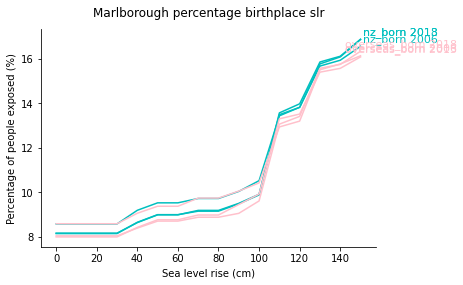

Horizons


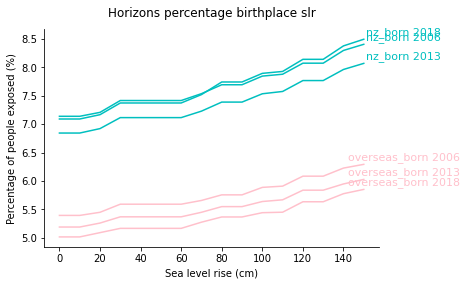

<Figure size 432x288 with 0 Axes>

In [16]:
#slr progression - nz born or overseas


for i in range(0, 2, 1):
    rc = rc_names[i]
    print(rc)
    '''collate relevent data'''
    v_nz_born_06 = [regional_dict[rc]['slr_{}'.format(i)]['C06_Birthp'] for i in range(0,160,10)]
    v_nz_born_13 = [regional_dict[rc]['slr_{}'.format(i)]['C13_Birthp'] for i in range(0,160,10)]
    v_nz_born_18 = [regional_dict[rc]['slr_{}'.format(i)]['C18_Birthp'] for i in range(0,160,10)]
    v_overseas_born_06 = [regional_dict[rc]['slr_{}'.format(i)]['C06_Birt_1'] for i in range(0,160,10)]
    v_overseas_born_13 = [regional_dict[rc]['slr_{}'.format(i)]['C13_Birt_1'] for i in range(0,160,10)]
    v_overseas_born_18 = [regional_dict[rc]['slr_{}'.format(i)]['C18_Birt_1'] for i in range(0,160,10)]
    total_06 = [sum(x) for x in zip(v_nz_born_06, v_overseas_born_06)]
    total_13 = [sum(x) for x in zip(v_nz_born_13, v_overseas_born_13)]
    total_18 = [sum(x) for x in zip(v_nz_born_18, v_overseas_born_18)]
    p_nz_born_06 = [((x/y)*100) for x, y in zip(v_nz_born_06, total_06)]
    p_nz_born_13 = [((x/y)*100) for x, y in zip(v_nz_born_13, total_13)]
    p_nz_born_18 = [((x/y)*100) for x, y in zip(v_nz_born_18, total_18)]
    p_overseas_born_06 = [((x/y)*100) for x, y in zip(v_overseas_born_06, total_06)]
    p_overseas_born_13 = [((x/y)*100) for x, y in zip(v_overseas_born_13, total_13)]
    p_overseas_born_18 = [((x/y)*100) for x, y in zip(v_overseas_born_18, total_18)]
    r_nz_born_06 = [regional_noslr_dict[rc]['C06_Birthp'] for i in range(0, 160, 10)]
    r_nz_born_13 = [regional_noslr_dict[rc]['C13_Birthp'] for i in range(0, 160, 10)]
    r_nz_born_18 = [regional_noslr_dict[rc]['C18_Birthp'] for i in range(0, 160, 10)]
    r_overseas_born_06 = [regional_noslr_dict[rc]['C06_Birt_1'] for i in range(0, 160, 10)]
    r_overseas_born_13 = [regional_noslr_dict[rc]['C13_Birt_1'] for i in range(0, 160, 10)]
    r_overseas_born_18 = [regional_noslr_dict[rc]['C18_Birt_1'] for i in range(0, 160, 10)]
    pc_nz_born_06 = [z-(x/((x+y)/100)) for x, y, z in zip(r_nz_born_06, r_overseas_born_06, p_nz_born_06)]
    pc_nz_born_13 = [z-(x/((x+y)/100)) for x, y, z in zip(r_nz_born_13, r_overseas_born_13, p_nz_born_13)]
    pc_nz_born_18 = [z-(x/((x+y)/100)) for x, y, z in zip(r_nz_born_18, r_overseas_born_18, p_nz_born_18)]
    pc_overseas_born_06 = [z-(x/((x+y)/100)) for x, y, z in zip(r_overseas_born_06, r_overseas_born_06, p_overseas_born_06)]
    pc_overseas_born_13 = [z-(x/((x+y)/100)) for x, y, z in zip(r_overseas_born_13, r_overseas_born_13, p_overseas_born_13)]
    pc_overseas_born_18 = [z-(x/((x+y)/100)) for x, y, z in zip(r_overseas_born_18, r_overseas_born_18, p_overseas_born_18)]
    po_nz_born_06 = [x/(y/100) for x, y in zip(v_nz_born_06, r_nz_born_06)]
    po_nz_born_13 = [x/(y/100) for x, y in zip(v_nz_born_13, r_nz_born_13)]
    po_nz_born_18 = [x/(y/100) for x, y in zip(v_nz_born_18, r_nz_born_18)]
    po_overseas_born_06 = [x/(y/100) for x, y in zip(v_overseas_born_06, r_overseas_born_06)]
    po_overseas_born_13 = [x/(y/100) for x, y in zip(v_overseas_born_13, r_overseas_born_13)]
    po_overseas_born_18 = [x/(y/100) for x, y in zip(v_overseas_born_18, r_overseas_born_18)]

    '''make all this plotting useful and orderly'''
    title_offset = 1.03
    overseas_born_ad_offset = (40, 5)

    '''creating values'''
    slr_short = [0, 50, 100, 150]
    vs_nz_df_06 = pd.DataFrame({'slr' : slr_short})
    vs_nz_df_06.columns.name = rc
    vs_nz_df_13 = pd.DataFrame({})
    vs_nz_df_13.columns.name = rc
    vs_nz_df_18 = pd.DataFrame({})
    vs_nz_df_18.columns.name = rc
    vs_overseas_df_06 = pd.DataFrame({'slr' : slr_short})
    vs_overseas_df_06.columns.name = rc
    vs_overseas_df_13 = pd.DataFrame({})
    vs_overseas_df_13.columns.name = rc
    vs_overseas_df_18 = pd.DataFrame({})
    vs_overseas_df_18.columns.name = rc
    pos_nz_df_06 = pd.DataFrame({})
    pos_nz_df_06.columns.name = rc
    pos_nz_df_13 = pd.DataFrame({})
    pos_nz_df_13.columns.name = rc
    pos_nz_df_18 = pd.DataFrame({})
    pos_nz_df_18.columns.name = rc
    pos_overseas_df_06 = pd.DataFrame({})
    pos_overseas_df_06.columns.name = rc
    pos_overseas_df_13 = pd.DataFrame({})
    pos_overseas_df_13.columns.name = rc
    pos_overseas_df_18 = pd.DataFrame({})
    pos_overseas_df_18.columns.name = rc

    vs_nz_l1_06 = []
    vs_nz_l1_13 = []
    vs_nz_l1_18 = []
    pos_nz_l1_06 = []
    pos_nz_l1_13 = []
    pos_nz_l1_18 = []
    vs_overseas_l1_06 = []
    vs_overseas_l1_13 = []
    vs_overseas_l1_18 = []
    pos_overseas_l1_06 = []
    pos_overseas_l1_13 = []
    pos_overseas_l1_18 = []

    for i in range(0, 16, 5):
        vs_nz_l2_06 = v_nz_born_06[i]
        vs_nz_l1_06.append(vs_nz_l2_06)
        vs_nz_l2_13 = v_nz_born_13[i]
        vs_nz_l1_13.append(vs_nz_l2_13)
        vs_nz_l2_18 = v_nz_born_18[i]
        vs_nz_l1_18.append(vs_nz_l2_18)
        pos_nz_l2_06 = po_nz_born_06[i]
        pos_nz_l1_06.append(pos_nz_l2_06)
        pos_nz_l2_13 = po_nz_born_13[i]
        pos_nz_l1_13.append(pos_nz_l2_13)
        pos_nz_l2_18 = po_nz_born_18[i]
        pos_nz_l1_18.append(pos_nz_l2_18)
        vs_overseas_l2_06 = v_nz_born_06[i]
        vs_overseas_l1_06.append(vs_nz_l2_06)
        vs_overseas_l2_13 = v_nz_born_13[i]
        vs_overseas_l1_13.append(vs_nz_l2_13)
        vs_overseas_l2_18 = v_nz_born_18[i]
        vs_overseas_l1_18.append(vs_nz_l2_18)
        pos_overseas_l2_06 = po_nz_born_06[i]
        pos_overseas_l1_06.append(pos_nz_l2_06)
        pos_overseas_l2_13 = po_nz_born_13[i]
        pos_overseas_l1_13.append(pos_nz_l2_13)
        pos_overseas_l2_18 = po_nz_born_18[i]
        pos_overseas_l1_18.append(pos_nz_l2_18)
    vs_nz_df_06['2006'] = [round(num, 1) for num in pos_nz_l1_06]
    vs_nz_df_13['2013'] = [round(num, 1) for num in pos_nz_l1_13]
    vs_nz_df_18['2018'] = [round(num, 1) for num in pos_nz_l1_18]
    pos_nz_df_06['2006'] = [round(num, 1) for num in pos_nz_l1_06]
    pos_nz_df_13['2013'] = [round(num, 1) for num in pos_nz_l1_13]
    pos_nz_df_18['2018'] = [round(num, 1) for num in pos_nz_l1_18]
    vs_overseas_df_06['2006'] = [round(num, 1) for num in pos_overseas_l1_06]
    vs_overseas_df_13['2013'] = [round(num, 1) for num in pos_overseas_l1_13]
    vs_overseas_df_18['2018'] = [round(num, 1) for num in pos_overseas_l1_18]
    pos_overseas_df_06['2006'] = [round(num, 1) for num in pos_overseas_l1_06]
    pos_overseas_df_13['2013'] = [round(num, 1) for num in pos_overseas_l1_13]
    pos_overseas_df_18['2018'] = [round(num, 1) for num in pos_overseas_l1_18]

    vs_nz_df_all = pd.concat([vs_nz_df_06, vs_nz_df_13, vs_nz_df_18], axis=1)
    pos_nz_df_all = pd.concat([pos_nz_df_06, pos_nz_df_13, pos_nz_df_18], axis=1)
    vs_overseas_df_all = pd.concat([vs_overseas_df_06, vs_overseas_df_13, vs_overseas_df_18], axis=1)
    pos_overseas_df_all = pd.concat([pos_overseas_df_06, pos_overseas_df_13, pos_overseas_df_18], axis=1)



    '''plot slr percentage overall '''
    plt.plot(slr, po_nz_born_06, label="nz_born 06", color="c")
    plt.annotate('nz_born 2006', (150, po_nz_born_06[15]), textcoords="offset points", xytext=(40,5), fontsize=11, ha='center', color='c')
    plt.plot(slr, po_nz_born_13, label="nz_born 13", color="c")
    plt.annotate('nz_born 2013', (150, po_nz_born_13[15]), textcoords="offset points", xytext=(40,5), fontsize=11, ha='center', color='c')
    plt.plot(slr, po_nz_born_18, label="nz_born 18", color="c")
    plt.annotate('nz_born 2018', (150, po_nz_born_18[15]), textcoords="offset points", xytext=(40,5), fontsize=11, ha='center', color='c')
    plt.plot(slr, po_overseas_born_06, label="overseas_born 06", color="pink")
    plt.annotate('overseas_born 2006', (150, po_overseas_born_06[15]), textcoords="offset points", xytext=overseas_born_ad_offset, fontsize=11, ha='center', color='pink')
    plt.plot(slr, po_overseas_born_13, label="overseas_born 13", color="pink")
    plt.annotate('overseas_born 2013', (150, po_overseas_born_13[15]), textcoords="offset points", xytext=overseas_born_ad_offset, fontsize=11, ha='center', color='pink')
    plt.plot(slr, po_overseas_born_18, label="overseas_born 18", color="pink")
    plt.annotate('overseas_born 2018', (150, po_overseas_born_18[15]), textcoords="offset points", xytext=overseas_born_ad_offset, fontsize=11, ha='center', color='pink')
    plt.xlabel('Sea level rise (cm)')
    plt.ylabel('Percentage of people exposed (%)')
    plt.title(rc + ' percentage birthplace slr', y=title_offset)
    ax = plt.subplot(111)
    ax.spines["right"].set_visible(False)
    ax.spines["top"].set_visible(False)
    plt.savefig('results/birthplace_slr/' + rc + '_percentageoverall_birthplace.png')
    plt.show()
    plt.clf()

Marlborough
Marlborough            slr  2006  2013  2018  2006  2013  2018
0            Maori descent                                    
1                        0   9.3   8.7   8.8   9.3   8.7   8.8
2                       50  10.1   9.4   9.7  10.1   9.4   9.7
3                      100  11.2  10.3  10.5  11.2  10.3  10.5
4                      150  17.2  17.4  17.5  17.2  17.4  17.5
Marlborough               slr  2006  2013  2018  2006  2013  2018
0            No Maori descent                                    
1                           0   9.3   8.7   8.8   9.3   8.7   8.8
2                          50  10.1   9.4   9.7  10.1   9.4   9.7
3                         100  11.2  10.3  10.5  11.2  10.3  10.5
4                         150  17.2  17.4  17.5  17.2  17.4  17.5


C:\Program Files\Anaconda3\envs\spatial\lib\site-packages\ipykernel_launcher.py:161: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


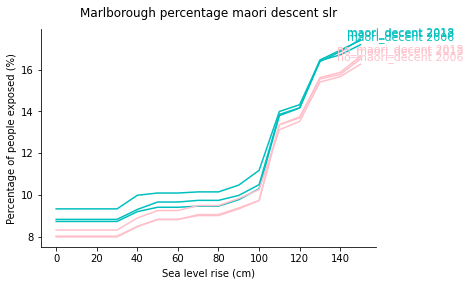

Horizons
Horizons            slr 2006 2013 2018 2006 2013 2018
0         Maori descent                              
1                     0  7.7  7.3  7.5  7.7  7.3  7.5
2                    50    8  7.5  7.7    8  7.5  7.7
3                   100  8.6    8  8.3  8.6    8  8.3
4                   150  9.3  8.5  8.9  9.3  8.5  8.9
Horizons               slr 2006 2013 2018 2006 2013 2018
0         No Maori descent                              
1                        0  7.7  7.3  7.5  7.7  7.3  7.5
2                       50    8  7.5  7.7    8  7.5  7.7
3                      100  8.6    8  8.3  8.6    8  8.3
4                      150  9.3  8.5  8.9  9.3  8.5  8.9


C:\Program Files\Anaconda3\envs\spatial\lib\site-packages\ipykernel_launcher.py:161: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


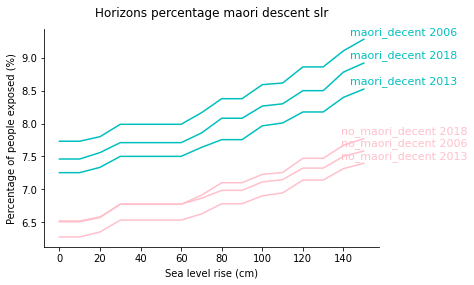

<Figure size 432x288 with 0 Axes>

In [17]:
#slr progression - maori descent

for i in range(0, 2, 1):
    rc = rc_names[i]
    print(rc)
    '''collate relevent data'''
    v_maori_decent_06 = [regional_dict[rc]['slr_{}'.format(i)]['C06_Maori_'] for i in range(0,160,10)]
    v_maori_decent_13 = [regional_dict[rc]['slr_{}'.format(i)]['C13_Maori_'] for i in range(0,160,10)]
    v_maori_decent_18 = [regional_dict[rc]['slr_{}'.format(i)]['C18_Maori_'] for i in range(0,160,10)]
    v_no_maori_decent_06 = [regional_dict[rc]['slr_{}'.format(i)]['C06_Maor_1'] for i in range(0,160,10)]
    v_no_maori_decent_13 = [regional_dict[rc]['slr_{}'.format(i)]['C13_Maor_1'] for i in range(0,160,10)]
    v_no_maori_decent_18 = [regional_dict[rc]['slr_{}'.format(i)]['C18_Maor_1'] for i in range(0,160,10)]
    total_06 = [sum(x) for x in zip(v_maori_decent_06, v_no_maori_decent_06)]
    total_13 = [sum(x) for x in zip(v_maori_decent_13, v_no_maori_decent_13)]
    total_18 = [sum(x) for x in zip(v_maori_decent_18, v_no_maori_decent_18)]
    p_maori_decent_06 = [((x/y)*100) for x, y in zip(v_maori_decent_06, total_06)]
    p_maori_decent_13 = [((x/y)*100) for x, y in zip(v_maori_decent_13, total_13)]
    p_maori_decent_18 = [((x/y)*100) for x, y in zip(v_maori_decent_18, total_18)]
    p_no_maori_decent_06 = [((x/y)*100) for x, y in zip(v_no_maori_decent_06, total_06)]
    p_no_maori_decent_13 = [((x/y)*100) for x, y in zip(v_no_maori_decent_13, total_13)]
    p_no_maori_decent_18 = [((x/y)*100) for x, y in zip(v_no_maori_decent_18, total_18)]
    r_maori_decent_06 = [regional_noslr_dict[rc]['C06_Maori_'] for i in range(0, 160, 10)]
    r_maori_decent_13 = [regional_noslr_dict[rc]['C13_Maori_'] for i in range(0, 160, 10)]
    r_maori_decent_18 = [regional_noslr_dict[rc]['C18_Maori_'] for i in range(0, 160, 10)]
    r_no_maori_decent_06 = [regional_noslr_dict[rc]['C06_Maor_1'] for i in range(0, 160, 10)]
    r_no_maori_decent_13 = [regional_noslr_dict[rc]['C13_Maor_1'] for i in range(0, 160, 10)]
    r_no_maori_decent_18 = [regional_noslr_dict[rc]['C18_Maor_1'] for i in range(0, 160, 10)]
    po_maori_decent_06 = [x/(y/100) for x, y in zip(v_maori_decent_06, r_maori_decent_06)]
    po_maori_decent_13 = [x/(y/100) for x, y in zip(v_maori_decent_13, r_maori_decent_13)]
    po_maori_decent_18 = [x/(y/100) for x, y in zip(v_maori_decent_18, r_maori_decent_18)]
    po_no_maori_decent_06 = [x/(y/100) for x, y in zip(v_no_maori_decent_06, r_no_maori_decent_06)]
    po_no_maori_decent_13 = [x/(y/100) for x, y in zip(v_no_maori_decent_13, r_no_maori_decent_13)]
    po_no_maori_decent_18 = [x/(y/100) for x, y in zip(v_no_maori_decent_18, r_no_maori_decent_18)]

    '''make all this plotting useful and orderly'''
    title_offset = 1.03
    no_maori_decent_ad_offset = (40, 5)

    '''creating values'''
    slr_short = [0, 50, 100, 150]
    vs_maori_decent_df_06 = pd.DataFrame({'slr' : slr_short})
    vs_maori_decent_df_06.columns.name = rc
    vs_maori_decent_df_13 = pd.DataFrame({})
    vs_maori_decent_df_13.columns.name = rc
    vs_maori_decent_df_18 = pd.DataFrame({})
    vs_maori_decent_df_18.columns.name = rc
    vs_no_maori_decent_df_06 = pd.DataFrame({'slr' : slr_short})
    vs_no_maori_decent_df_06.columns.name = rc
    vs_no_maori_decent_df_13 = pd.DataFrame({})
    vs_no_maori_decent_df_13.columns.name = rc
    vs_no_maori_decent_df_18 = pd.DataFrame({})
    vs_no_maori_decent_df_18.columns.name = rc
    pos_maori_decent_df_06 = pd.DataFrame({})
    pos_maori_decent_df_06.columns.name = rc
    pos_maori_decent_df_13 = pd.DataFrame({})
    pos_maori_decent_df_13.columns.name = rc
    pos_maori_decent_df_18 = pd.DataFrame({})
    pos_maori_decent_df_18.columns.name = rc
    pos_no_maori_decent_df_06 = pd.DataFrame({})
    pos_no_maori_decent_df_06.columns.name = rc
    pos_no_maori_decent_df_13 = pd.DataFrame({})
    pos_no_maori_decent_df_13.columns.name = rc
    pos_no_maori_decent_df_18 = pd.DataFrame({})
    pos_no_maori_decent_df_18.columns.name = rc

    vs_maori_decent_l1_06 = []
    vs_maori_decent_l1_13 = []
    vs_maori_decent_l1_18 = []
    pos_maori_decent_l1_06 = []
    pos_maori_decent_l1_13 = []
    pos_maori_decent_l1_18 = []
    vs_no_maori_decent_l1_06 = []
    vs_no_maori_decent_l1_13 = []
    vs_no_maori_decent_l1_18 = []
    pos_no_maori_decent_l1_06 = []
    pos_no_maori_decent_l1_13 = []
    pos_no_maori_decent_l1_18 = []

    for i in range(0, 16, 5):
        vs_maori_decent_l2_06 = v_maori_decent_06[i]
        vs_maori_decent_l1_06.append(vs_maori_decent_l2_06)
        vs_maori_decent_l2_13 = v_maori_decent_13[i]
        vs_maori_decent_l1_13.append(vs_maori_decent_l2_13)
        vs_maori_decent_l2_18 = v_maori_decent_18[i]
        vs_maori_decent_l1_18.append(vs_maori_decent_l2_18)
        pos_maori_decent_l2_06 = po_maori_decent_06[i]
        pos_maori_decent_l1_06.append(pos_maori_decent_l2_06)
        pos_maori_decent_l2_13 = po_maori_decent_13[i]
        pos_maori_decent_l1_13.append(pos_maori_decent_l2_13)
        pos_maori_decent_l2_18 = po_maori_decent_18[i]
        pos_maori_decent_l1_18.append(pos_maori_decent_l2_18)
        vs_no_maori_decent_l2_06 = v_maori_decent_06[i]
        vs_no_maori_decent_l1_06.append(vs_maori_decent_l2_06)
        vs_no_maori_decent_l2_13 = v_maori_decent_13[i]
        vs_no_maori_decent_l1_13.append(vs_maori_decent_l2_13)
        vs_no_maori_decent_l2_18 = v_maori_decent_18[i]
        vs_no_maori_decent_l1_18.append(vs_maori_decent_l2_18)
        pos_no_maori_decent_l2_06 = po_maori_decent_06[i]
        pos_no_maori_decent_l1_06.append(pos_maori_decent_l2_06)
        pos_no_maori_decent_l2_13 = po_maori_decent_13[i]
        pos_no_maori_decent_l1_13.append(pos_maori_decent_l2_13)
        pos_no_maori_decent_l2_18 = po_maori_decent_18[i]
        pos_no_maori_decent_l1_18.append(pos_maori_decent_l2_18)
    vs_maori_decent_df_06['2006'] = [round(num, 1) for num in pos_maori_decent_l1_06]
    vs_maori_decent_df_13['2013'] = [round(num, 1) for num in pos_maori_decent_l1_13]
    vs_maori_decent_df_18['2018'] = [round(num, 1) for num in pos_maori_decent_l1_18]
    pos_maori_decent_df_06['2006'] = [round(num, 1) for num in pos_maori_decent_l1_06]
    pos_maori_decent_df_13['2013'] = [round(num, 1) for num in pos_maori_decent_l1_13]
    pos_maori_decent_df_18['2018'] = [round(num, 1) for num in pos_maori_decent_l1_18]
    vs_no_maori_decent_df_06['2006'] = [round(num, 1) for num in pos_no_maori_decent_l1_06]
    vs_no_maori_decent_df_13['2013'] = [round(num, 1) for num in pos_no_maori_decent_l1_13]
    vs_no_maori_decent_df_18['2018'] = [round(num, 1) for num in pos_no_maori_decent_l1_18]
    pos_no_maori_decent_df_06['2006'] = [round(num, 1) for num in pos_no_maori_decent_l1_06]
    pos_no_maori_decent_df_13['2013'] = [round(num, 1) for num in pos_no_maori_decent_l1_13]
    pos_no_maori_decent_df_18['2018'] = [round(num, 1) for num in pos_no_maori_decent_l1_18]

    vs_maori_decent_df_all = pd.concat([vs_maori_decent_df_06, vs_maori_decent_df_13, vs_maori_decent_df_18], axis=1)
    pos_maori_decent_df_all = pd.concat([pos_maori_decent_df_06, pos_maori_decent_df_13, pos_maori_decent_df_18], axis=1)
    vs_no_maori_decent_df_all = pd.concat([vs_no_maori_decent_df_06, vs_no_maori_decent_df_13, vs_no_maori_decent_df_18], axis=1)
    pos_no_maori_decent_df_all = pd.concat([pos_no_maori_decent_df_06, pos_no_maori_decent_df_13, pos_no_maori_decent_df_18], axis=1)

    '''values in table '''
    
    
    maoridescent_all_df = pd.concat([vs_maori_decent_df_all, pos_maori_decent_df_all], axis=1)
    maoridescent_all_df.loc[-1] = ['Maori descent', '', '', '', '', '', '']
    maoridescent_all_df.index = maoridescent_all_df.index + 1
    maoridescent_all_df.sort_index(inplace=True)
    maoridescent_all_df.to_csv('results/maoridescent_slr/' + rc + '_maoridescent.csv', mode='a')
    print(maoridescent_all_df)

    nodescent_all_df = pd.concat([vs_no_maori_decent_df_all, pos_no_maori_decent_df_all], axis=1)
    nodescent_all_df.loc[-1] = ['No Maori descent', '', '', '', '', '', '']
    nodescent_all_df.index = nodescent_all_df.index + 1
    nodescent_all_df.sort_index(inplace=True)
    nodescent_all_df.to_csv('results/maoridescent_slr/' + rc +  '_nomaoridescent.csv', mode='a')
    print(nodescent_all_df)
    
    md_all_df = pd.concat([maoridescent_all_df , nodescent_all_df], axis=0)
    md_all_df.to_csv('results/maoridescent_slr/' + rc +  '_all.csv', mode='a')




    '''plot slr percentage overall '''
    plt.plot(slr, po_maori_decent_06, label="maori_decent 06", color="c")
    plt.annotate('maori_decent 2006', (150, po_maori_decent_06[15]), textcoords="offset points", xytext=(40,5), fontsize=11, ha='center', color='c')
    plt.plot(slr, po_maori_decent_13, label="maori_decent 13", color="c")
    plt.annotate('maori_decent 2013', (150, po_maori_decent_13[15]), textcoords="offset points", xytext=(40,5), fontsize=11, ha='center', color='c')
    plt.plot(slr, po_maori_decent_18, label="maori_decent 18", color="c")
    plt.annotate('maori_decent 2018', (150, po_maori_decent_18[15]), textcoords="offset points", xytext=(40,5), fontsize=11, ha='center', color='c')
    plt.plot(slr, po_no_maori_decent_06, label="no_maori_decent 06", color="pink")
    plt.annotate('no_maori_decent 2006', (150, po_no_maori_decent_06[15]), textcoords="offset points", xytext=no_maori_decent_ad_offset, fontsize=11, ha='center', color='pink')
    plt.plot(slr, po_no_maori_decent_13, label="no_maori_decent 13", color="pink")
    plt.annotate('no_maori_decent 2013', (150, po_no_maori_decent_13[15]), textcoords="offset points", xytext=no_maori_decent_ad_offset, fontsize=11, ha='center', color='pink')
    plt.plot(slr, po_no_maori_decent_18, label="no_maori_decent 18", color="pink")
    plt.annotate('no_maori_decent 2018', (150, po_no_maori_decent_18[15]), textcoords="offset points", xytext=no_maori_decent_ad_offset, fontsize=11, ha='center', color='pink')
    plt.xlabel('Sea level rise (cm)')
    plt.ylabel('Percentage of people exposed (%)')
    plt.title(rc + ' percentage maori descent slr', y=title_offset)
    ax = plt.subplot(111)
    ax.spines["right"].set_visible(False)
    ax.spines["top"].set_visible(False)
    plt.savefig('results/maoridescent_slr/' + rc + '_maoridescent.png')
    plt.show()
    plt.clf()

Marlborough


C:\Program Files\Anaconda3\envs\spatial\lib\site-packages\ipykernel_launcher.py:132: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


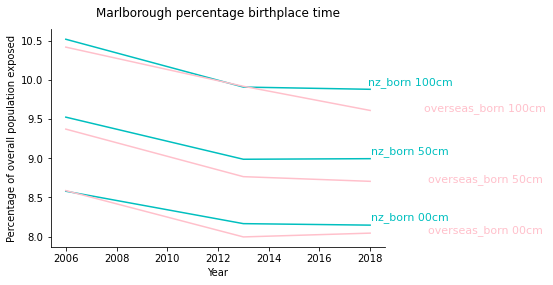

Horizons


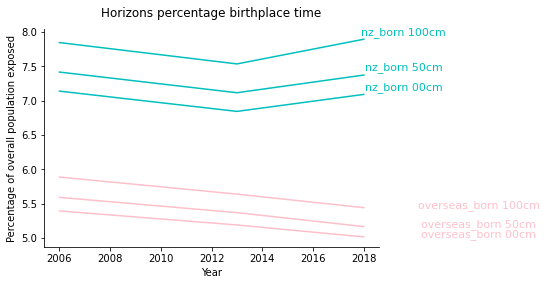

<Figure size 432x288 with 0 Axes>

In [18]:
#time progression - nz born or overseas

for rc in rc_names:
    print(rc)
    '''collate relevent data'''
    v_nz_born_06 = [regional_dict[rc]['slr_{}'.format(i)]['C06_Birthp'] for i in range(0,160,10)]
    v_nz_born_13 = [regional_dict[rc]['slr_{}'.format(i)]['C13_Birthp'] for i in range(0,160,10)]
    v_nz_born_18 = [regional_dict[rc]['slr_{}'.format(i)]['C18_Birthp'] for i in range(0,160,10)]
    v_overseas_born_06 = [regional_dict[rc]['slr_{}'.format(i)]['C06_Birt_1'] for i in range(0,160,10)]
    v_overseas_born_13 = [regional_dict[rc]['slr_{}'.format(i)]['C13_Birt_1'] for i in range(0,160,10)]
    v_overseas_born_18 = [regional_dict[rc]['slr_{}'.format(i)]['C18_Birt_1'] for i in range(0,160,10)]
    total_06 = [sum(x) for x in zip(v_nz_born_06, v_overseas_born_06)]
    total_13 = [sum(x) for x in zip(v_nz_born_13, v_overseas_born_13)]
    total_18 = [sum(x) for x in zip(v_nz_born_18, v_overseas_born_18)]
    p_nz_born_06 = [((x/y)*100) for x, y in zip(v_nz_born_06, total_06)]
    p_nz_born_13 = [((x/y)*100) for x, y in zip(v_nz_born_13, total_13)]
    p_nz_born_18 = [((x/y)*100) for x, y in zip(v_nz_born_18, total_18)]
    p_overseas_born_06 = [((x/y)*100) for x, y in zip(v_overseas_born_06, total_06)]
    p_overseas_born_13 = [((x/y)*100) for x, y in zip(v_overseas_born_13, total_13)]
    p_overseas_born_18 = [((x/y)*100) for x, y in zip(v_overseas_born_18, total_18)]
    r_nz_born_06 = [regional_noslr_dict[rc]['C06_Birthp'] for i in range(0, 160, 10)]
    r_nz_born_13 = [regional_noslr_dict[rc]['C13_Birthp'] for i in range(0, 160, 10)]
    r_nz_born_18 = [regional_noslr_dict[rc]['C18_Birthp'] for i in range(0, 160, 10)]
    r_overseas_born_06 = [regional_noslr_dict[rc]['C06_Birt_1'] for i in range(0, 160, 10)]
    r_overseas_born_13 = [regional_noslr_dict[rc]['C13_Birt_1'] for i in range(0, 160, 10)]
    r_overseas_born_18 = [regional_noslr_dict[rc]['C18_Birt_1'] for i in range(0, 160, 10)]
    po_nz_born_06 = [x/(y/100) for x, y in zip(v_nz_born_06, r_nz_born_06)]
    po_nz_born_13 = [x/(y/100) for x, y in zip(v_nz_born_13, r_nz_born_13)]
    po_nz_born_18 = [x/(y/100) for x, y in zip(v_nz_born_18, r_nz_born_18)]
    po_overseas_born_06 = [x/(y/100) for x, y in zip(v_overseas_born_06, r_overseas_born_06)]
    po_overseas_born_13 = [x/(y/100) for x, y in zip(v_overseas_born_13, r_overseas_born_13)]
    po_overseas_born_18 = [x/(y/100) for x, y in zip(v_overseas_born_18, r_overseas_born_18)]

    '''nz_born'''
    v_nz_born_dict_time = {}
    p_nz_born_dict_time = {}
    po_nz_born_dict_time = {}

    v_nz_born_df = pd.DataFrame({'years' : years})
    v_nz_born_df.columns.name = rc
    p_nz_born_df = pd.DataFrame({'years' : years})
    p_nz_born_df.columns.name = rc
    po_nz_born_df = pd.DataFrame({'years' : years})
    po_nz_born_df.columns.name = rc

    for i in range(0, 16, 1):
        v_nz_born_time = []
        v_nz_born_time.append(v_nz_born_06[i])
        v_nz_born_time.append(v_nz_born_13[i])
        v_nz_born_time.append(v_nz_born_18[i])
        v_nz_born_dict_time.update({'slr_{}0'.format(i) : v_nz_born_time})
        p_nz_born_time = []
        p_nz_born_time.append(p_nz_born_06[i])
        p_nz_born_time.append(p_nz_born_13[i])
        p_nz_born_time.append(p_nz_born_18[i])
        p_nz_born_dict_time.update({'slr_{}0'.format(i) : p_nz_born_time})
        po_nz_born_time = []
        po_nz_born_time.append(po_nz_born_06[i])
        po_nz_born_time.append(po_nz_born_13[i])
        po_nz_born_time.append(po_nz_born_18[i])
        po_nz_born_dict_time.update({'slr_{}0'.format(i) : po_nz_born_time})
        if i == 0 or i == 5 or i == 10:
            v_nz_born_df['slr_{}0'.format(i)] = v_nz_born_time
            po_nz_born_df['slr_{}0'.format(i)] = [round(num, 1) for num in po_nz_born_time]


    '''overseas_born'''
    v_overseas_born_dict_time = {}
    p_overseas_born_dict_time = {}
    po_overseas_born_dict_time = {}

    v_overseas_born_df = pd.DataFrame({'years' : years})
    v_overseas_born_df.columns.name = rc
    po_overseas_born_df = pd.DataFrame({'years' : years})
    po_overseas_born_df.columns.name = rc

    for i in range(0, 16, 1):
        v_overseas_born_time = []
        v_overseas_born_time.append(v_overseas_born_06[i])
        v_overseas_born_time.append(v_overseas_born_13[i])
        v_overseas_born_time.append(v_overseas_born_18[i])
        v_overseas_born_dict_time.update({'slr_{}0'.format(i) : v_overseas_born_time})
        p_overseas_born_time = []
        p_overseas_born_time.append(p_overseas_born_06[i])
        p_overseas_born_time.append(p_overseas_born_13[i])
        p_overseas_born_time.append(p_overseas_born_18[i])
        p_overseas_born_dict_time.update({'slr_{}0'.format(i) : p_overseas_born_time})
        po_overseas_born_time = []
        po_overseas_born_time.append(po_overseas_born_06[i])
        po_overseas_born_time.append(po_overseas_born_13[i])
        po_overseas_born_time.append(po_overseas_born_18[i])
        po_overseas_born_dict_time.update({'slr_{}0'.format(i) : po_overseas_born_time})
        if i == 0 or i == 5 or i == 10:
            v_overseas_born_df['slr_{}0'.format(i)] = v_overseas_born_time
            po_overseas_born_df['slr_{}0'.format(i)] = [round(num, 1) for num in po_overseas_born_time]

    '''values and percentage of overall in table'''
    ''' overseas_born_all_df = pd.concat([v_nz_born_df, po_nz_born_df ], axis=1)
    nzborn_all_df = pd.concat([v_overseas_born_df, po_overseas_born_df ], axis=1)

    overseas_born_all_df.loc[-1] = ['Overseas born', '', '', '', '', '', '']
    overseas_born_all_df.index = overseas_born_all_df.index + 1
    overseas_born_all_df.sort_index(inplace=True)
    nzborn_all_df.loc[-1] = ['NZ born', '', '', '', '', '', '']
    nzborn_all_df.index = nzborn_all_df.index + 1
    nzborn_all_df.sort_index(inplace=True)
    bp_all_df = pd.concat([overseas_born_all, nzborn_all_df], axis=0)
    bp_all_df.to_csv('results/birthplace_slr/' + rc +  '_all.csv', mode='a')
    '''
    '''make all this data useful and orderly'''
    birthplace_dict_time = {'nz_born_value' : v_nz_born_dict_time, 'nz_born_percentage' : p_nz_born_dict_time,  'nz_born_po' : po_nz_born_dict_time, 'overseas_born_value' : v_overseas_born_dict_time, 'overseas_born_percentage' : p_overseas_born_dict_time,'overseas_born_po' : po_overseas_born_dict_time}
    years = [2006, 2013, 2018]
    title_offset = 1.03




    '''plot slr increase percentage of overall population'''
    for i in range(0, 11, 5):
        x = 'slr_'+ str(i) + '0'
        y = "nz_born " + str(i) + "0cm"
        plt.plot(years, birthplace_dict_time['nz_born_po'][x], label=y, color="c")
        plt.annotate(y, (2018, birthplace_dict_time['nz_born_po'][x][2]), textcoords="offset points", xytext=(40,5), fontsize=11, ha='center', color='c')
    for i in range(0, 11, 5):
        x = 'slr_'+ str(i) + '0'
        y = "overseas_born " + str(i) + "0cm"
        plt.plot(years, birthplace_dict_time['overseas_born_po'][x], label=y, color="pink")
        plt.annotate(y, (2018, birthplace_dict_time['overseas_born_po'][x][2]), textcoords="offset points", xytext=(115,0), fontsize=11, ha='center', color='pink')
        plt.xlabel('Year')
        plt.ylabel('Percentage of overall population exposed')
        plt.title(rc + ' percentage birthplace time', y=title_offset)
        ax = plt.subplot(111)
        ax.spines["right"].set_visible(False)
        ax.spines["top"].set_visible(False)
    plt.savefig('results/birthplace_time/' + rc + '_percentageoverall_birthplace.png')
    plt.show()
    plt.clf()

Marlborough


C:\Program Files\Anaconda3\envs\spatial\lib\site-packages\ipykernel_launcher.py:149: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


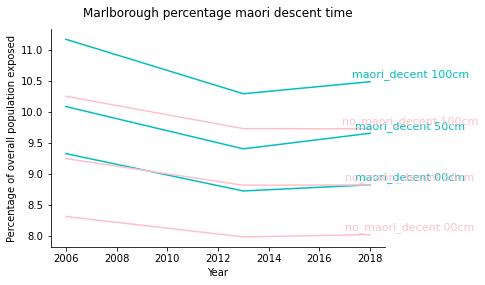

Horizons


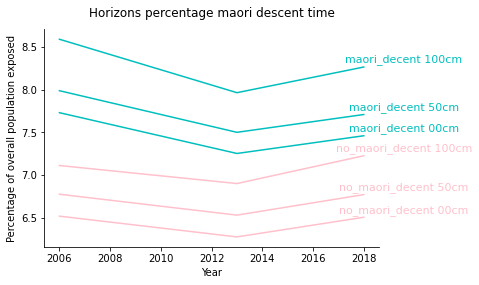

<Figure size 432x288 with 0 Axes>

In [19]:
#time progression - maori descent

for rc in rc_names:
    print(rc)
    '''collate relevent data'''
    v_maori_decent_06 = [regional_dict[rc]['slr_{}'.format(i)]['C06_Maori_'] for i in range(0,160,10)]
    v_maori_decent_13 = [regional_dict[rc]['slr_{}'.format(i)]['C13_Maori_'] for i in range(0,160,10)]
    v_maori_decent_18 = [regional_dict[rc]['slr_{}'.format(i)]['C18_Maori_'] for i in range(0,160,10)]
    v_no_maori_decent_06 = [regional_dict[rc]['slr_{}'.format(i)]['C06_Maor_1'] for i in range(0,160,10)]
    v_no_maori_decent_13 = [regional_dict[rc]['slr_{}'.format(i)]['C13_Maor_1'] for i in range(0,160,10)]
    v_no_maori_decent_18 = [regional_dict[rc]['slr_{}'.format(i)]['C18_Maor_1'] for i in range(0,160,10)]
    total_06 = [sum(x) for x in zip(v_maori_decent_06, v_no_maori_decent_06)]
    total_13 = [sum(x) for x in zip(v_maori_decent_13, v_no_maori_decent_13)]
    total_18 = [sum(x) for x in zip(v_maori_decent_18, v_no_maori_decent_18)]
    p_maori_decent_06 = [((x/y)*100) for x, y in zip(v_maori_decent_06, total_06)]
    p_maori_decent_13 = [((x/y)*100) for x, y in zip(v_maori_decent_13, total_13)]
    p_maori_decent_18 = [((x/y)*100) for x, y in zip(v_maori_decent_18, total_18)]
    p_no_maori_decent_06 = [((x/y)*100) for x, y in zip(v_no_maori_decent_06, total_06)]
    p_no_maori_decent_13 = [((x/y)*100) for x, y in zip(v_no_maori_decent_13, total_13)]
    p_no_maori_decent_18 = [((x/y)*100) for x, y in zip(v_no_maori_decent_18, total_18)]
    r_maori_decent_06 = [regional_noslr_dict[rc]['C06_Maori_'] for i in range(0, 160, 10)]
    r_maori_decent_13 = [regional_noslr_dict[rc]['C13_Maori_'] for i in range(0, 160, 10)]
    r_maori_decent_18 = [regional_noslr_dict[rc]['C18_Maori_'] for i in range(0, 160, 10)]
    r_no_maori_decent_06 = [regional_noslr_dict[rc]['C06_Maor_1'] for i in range(0, 160, 10)]
    r_no_maori_decent_13 = [regional_noslr_dict[rc]['C13_Maor_1'] for i in range(0, 160, 10)]
    r_no_maori_decent_18 = [regional_noslr_dict[rc]['C18_Maor_1'] for i in range(0, 160, 10)]
    pc_maori_decent_06 = [z-(x/((x+y)/100)) for x, y, z in zip(r_maori_decent_06, r_no_maori_decent_06, p_maori_decent_06)]
    pc_maori_decent_13 = [z-(x/((x+y)/100)) for x, y, z in zip(r_maori_decent_13, r_no_maori_decent_13, p_maori_decent_13)]
    pc_maori_decent_18 = [z-(x/((x+y)/100)) for x, y, z in zip(r_maori_decent_18, r_no_maori_decent_18, p_maori_decent_18)]
    pc_no_maori_decent_06 = [z-(x/((x+y)/100)) for x, y, z in zip(r_no_maori_decent_06, r_no_maori_decent_06, p_no_maori_decent_06)]
    pc_no_maori_decent_13 = [z-(x/((x+y)/100)) for x, y, z in zip(r_no_maori_decent_13, r_no_maori_decent_13, p_no_maori_decent_13)]
    pc_no_maori_decent_18 = [z-(x/((x+y)/100)) for x, y, z in zip(r_no_maori_decent_18, r_no_maori_decent_18, p_no_maori_decent_18)]
    po_maori_decent_06 = [x/(y/100) for x, y in zip(v_maori_decent_06, r_maori_decent_06)]
    po_maori_decent_13 = [x/(y/100) for x, y in zip(v_maori_decent_13, r_maori_decent_13)]
    po_maori_decent_18 = [x/(y/100) for x, y in zip(v_maori_decent_18, r_maori_decent_18)]
    po_no_maori_decent_06 = [x/(y/100) for x, y in zip(v_no_maori_decent_06, r_no_maori_decent_06)]
    po_no_maori_decent_13 = [x/(y/100) for x, y in zip(v_no_maori_decent_13, r_no_maori_decent_13)]
    po_no_maori_decent_18 = [x/(y/100) for x, y in zip(v_no_maori_decent_18, r_no_maori_decent_18)]

    '''maori_decent'''
    v_maori_decent_dict_time = {}
    p_maori_decent_dict_time = {}
    pc_maori_decent_dict_time = {}
    po_maori_decent_dict_time = {}

    if rc == 'otago':
        rc = 'otago   '

    v_maori_decent_df = pd.DataFrame({'years' : years})
    v_maori_decent_df.columns.name = rc
    p_maori_decent_df = pd.DataFrame({'years' : years})
    p_maori_decent_df.columns.name = rc
    pc_maori_decent_df = pd.DataFrame({'years' : years})
    pc_maori_decent_df.columns.name = rc
    po_maori_decent_df = pd.DataFrame({'years' : years})
    po_maori_decent_df.columns.name = rc

    for i in range(0, 16, 1):
        v_maori_decent_time = []
        v_maori_decent_time.append(v_maori_decent_06[i])
        v_maori_decent_time.append(v_maori_decent_13[i])
        v_maori_decent_time.append(v_maori_decent_18[i])
        v_maori_decent_dict_time.update({'slr_{}0'.format(i) : v_maori_decent_time})
        p_maori_decent_time = []
        p_maori_decent_time.append(p_maori_decent_06[i])
        p_maori_decent_time.append(p_maori_decent_13[i])
        p_maori_decent_time.append(p_maori_decent_18[i])
        p_maori_decent_dict_time.update({'slr_{}0'.format(i) : p_maori_decent_time})
        po_maori_decent_time = []
        po_maori_decent_time.append(po_maori_decent_06[i])
        po_maori_decent_time.append(po_maori_decent_13[i])
        po_maori_decent_time.append(po_maori_decent_18[i])
        po_maori_decent_dict_time.update({'slr_{}0'.format(i) : po_maori_decent_time})
        if i == 0 or i == 5 or i == 10:
            v_maori_decent_df['slr_{}0'.format(i)] = v_maori_decent_time
            po_maori_decent_df['slr_{}0'.format(i)] = [round(num, 1) for num in po_maori_decent_time]


    '''no_maori_decent'''
    v_no_maori_decent_dict_time = {}
    p_no_maori_decent_dict_time = {}
    pc_no_maori_decent_dict_time = {}
    po_no_maori_decent_dict_time = {}

    if rc == 'otago':
        rc = 'otago   '

    v_no_maori_decent_df = pd.DataFrame({'years' : years})
    v_no_maori_decent_df.columns.name = rc
    po_no_maori_decent_df = pd.DataFrame({'years' : years})
    po_no_maori_decent_df.columns.name = rc

    for i in range(0, 16, 1):
        v_no_maori_decent_time = []
        v_no_maori_decent_time.append(v_no_maori_decent_06[i])
        v_no_maori_decent_time.append(v_no_maori_decent_13[i])
        v_no_maori_decent_time.append(v_no_maori_decent_18[i])
        v_no_maori_decent_dict_time.update({'slr_{}0'.format(i) : v_no_maori_decent_time})
        p_no_maori_decent_time = []
        p_no_maori_decent_time.append(p_no_maori_decent_06[i])
        p_no_maori_decent_time.append(p_no_maori_decent_13[i])
        p_no_maori_decent_time.append(p_no_maori_decent_18[i])
        p_no_maori_decent_dict_time.update({'slr_{}0'.format(i) : p_no_maori_decent_time})
        po_no_maori_decent_time = []
        po_no_maori_decent_time.append(po_no_maori_decent_06[i])
        po_no_maori_decent_time.append(po_no_maori_decent_13[i])
        po_no_maori_decent_time.append(po_no_maori_decent_18[i])
        po_no_maori_decent_dict_time.update({'slr_{}0'.format(i) : po_no_maori_decent_time})
        if i == 0 or i == 5 or i == 10:
            v_no_maori_decent_df['slr_{}0'.format(i)] = v_no_maori_decent_time
            po_no_maori_decent_df['slr_{}0'.format(i)] = [round(num, 1) for num in po_no_maori_decent_time]

    '''values and percentage of overall in table'''
    '''maori_decent_all_df = pd.concat([v_maori_decent_df, po_maori_decent_df ], axis=1)
    no_maori_decent_all_df = pd.concat([v_no_maori_decent_df, po_no_maori_decent_df ], axis=1)
    maori_decent_all_df.loc[-1] = [rc, '', '', '', '', '', '']
    maori_decent_all_df.index = maori_decent_all_df.index + 1
    maori_decent_all_df.sort_index(inplace=True)
    no_maori_decent_all_df = pd.concat([vs_mal_df_all, pos_mal_df_all], axis=1)
    no_maori_decent_all_df.loc[-1] = [rc, '', '', '', '', '', '']
    no_maori_decent_all_df.index = no_maori_decent_all_df.index + 1
    no_maori_decent_all_df.sort_index(inplace=True)
    md_all_df = pd.concat([maori_decent_all_df, no_maori_decent_all_df], axis=0)
    md_all_df.to_csv('results/maoridescent_slr/' + rc +  '_all.csv', mode='a')'''


    '''make all this data useful and orderly'''
    Maoridescent_dict_time = {'maori_decent_value' : v_maori_decent_dict_time, 'maori_decent_percentage' : p_maori_decent_dict_time, 'maori_decent_pc' : pc_maori_decent_dict_time, 'maori_decent_po' : po_maori_decent_dict_time, 'no_maori_decent_value' : v_no_maori_decent_dict_time, 'no_maori_decent_percentage' : p_no_maori_decent_dict_time, 'no_maori_decent_pc' : pc_no_maori_decent_dict_time, 'no_maori_decent_po' : po_no_maori_decent_dict_time}
    years = [2006, 2013, 2018]
    title_offset = 1.03




    '''plot slr increase percentage of overall population'''
    for i in range(0, 11, 5):
        x = 'slr_'+ str(i) + '0'
        y = "maori_decent " + str(i) + "0cm"
        plt.plot(years, Maoridescent_dict_time['maori_decent_po'][x], label=y, color="c")
        plt.annotate(y, (2018, Maoridescent_dict_time['maori_decent_po'][x][2]), textcoords="offset points", xytext=(40,5), fontsize=11, ha='center', color='c')
    for i in range(0, 11, 5):
        x = 'slr_'+ str(i) + '0'
        y = "no_maori_decent " + str(i) + "0cm"
        plt.plot(years, Maoridescent_dict_time['no_maori_decent_po'][x], label=y, color="pink")
        plt.annotate(y, (2018, Maoridescent_dict_time['no_maori_decent_po'][x][2]), textcoords="offset points", xytext=(40, 5), fontsize=11, ha='center', color='pink')
        plt.xlabel('Year')
        plt.ylabel('Percentage of overall population exposed')
        plt.title(rc + ' percentage maori descent time', y=title_offset)
        ax = plt.subplot(111)
        ax.spines["right"].set_visible(False)
        ax.spines["top"].set_visible(False)
    plt.savefig('results/maoridescent_time/' + rc + '_percentageoverall_maoridescent.png')
    plt.show()
    plt.clf()
    

Horizons


C:\Program Files\Anaconda3\envs\spatial\lib\site-packages\ipykernel_launcher.py:300: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


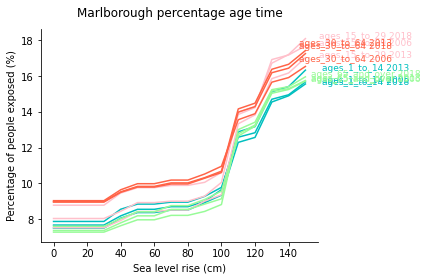

<Figure size 432x288 with 0 Axes>

In [20]:
for i in range(0, 1, 1):
    print(rc)
    rc = rc_names[i]
    '''collate relevent data'''
    v_ages_1_to_14_06 = [regional_dict[rc]['slr_{}'.format(i)]['C06_Agelif'] for i in range(0,160,10)]
    v_ages_1_to_14_13 = [regional_dict[rc]['slr_{}'.format(i)]['C13_Agelif'] for i in range(0,160,10)]
    v_ages_1_to_14_18 = [regional_dict[rc]['slr_{}'.format(i)]['C18_Agelif'] for i in range(0,160,10)]
    v_ages_15_to_29_06 = [regional_dict[rc]['slr_{}'.format(i)]['C06_Agel_1'] for i in range(0,160,10)]
    v_ages_15_to_29_13 = [regional_dict[rc]['slr_{}'.format(i)]['C13_Agel_1'] for i in range(0,160,10)]
    v_ages_15_to_29_18 = [regional_dict[rc]['slr_{}'.format(i)]['C18_Agel_1'] for i in range(0,160,10)]
    v_ages_30_to_64_06 = [regional_dict[rc]['slr_{}'.format(i)]['C06_Agel_2'] for i in range(0,160,10)]
    v_ages_30_to_64_13 = [regional_dict[rc]['slr_{}'.format(i)]['C13_Agel_2'] for i in range(0,160,10)]
    v_ages_30_to_64_18 = [regional_dict[rc]['slr_{}'.format(i)]['C18_Agel_2'] for i in range(0,160,10)]
    v_ages_65_and_over_06 = [regional_dict[rc]['slr_{}'.format(i)]['C06_Agel_3'] for i in range(0,160,10)]
    v_ages_65_and_over_13 = [regional_dict[rc]['slr_{}'.format(i)]['C13_Agel_3'] for i in range(0,160,10)]
    v_ages_65_and_over_18 = [regional_dict[rc]['slr_{}'.format(i)]['C18_Agel_3'] for i in range(0,160,10)]


    total_06 = [sum(x) for x in zip(v_ages_1_to_14_06, v_ages_15_to_29_06,v_ages_30_to_64_06,v_ages_65_and_over_06)]
    total_13 = [sum(x) for x in zip(v_ages_1_to_14_13, v_ages_15_to_29_13,v_ages_30_to_64_13,v_ages_65_and_over_13)]
    total_18 = [sum(x) for x in zip(v_ages_1_to_14_18, v_ages_15_to_29_18,v_ages_30_to_64_18,v_ages_65_and_over_18)]


    p_ages_1_to_14_06 = [((x/y)*100) for x, y in zip(v_ages_1_to_14_06, total_06)]
    p_ages_1_to_14_13 = [((x/y)*100) for x, y in zip(v_ages_1_to_14_13, total_13)]
    p_ages_1_to_14_18 = [((x/y)*100) for x, y in zip(v_ages_1_to_14_18, total_18)]
    p_ages_15_to_29_06 = [((x/y)*100) for x, y in zip(v_ages_15_to_29_06, total_06)]
    p_ages_15_to_29_13 = [((x/y)*100) for x, y in zip(v_ages_15_to_29_13, total_13)]
    p_ages_15_to_29_18 = [((x/y)*100) for x, y in zip(v_ages_15_to_29_18, total_18)]
    r_ages_1_to_14_06 = [regional_noslr_dict[rc]['C06_Agelif'] for i in range(0, 160, 10)]
    r_ages_1_to_14_13 = [regional_noslr_dict[rc]['C13_Agelif'] for i in range(0, 160, 10)]
    r_ages_1_to_14_18 = [regional_noslr_dict[rc]['C18_Agelif'] for i in range(0, 160, 10)]
    r_ages_15_to_29_06 = [regional_noslr_dict[rc]['C06_Agel_1'] for i in range(0, 160, 10)]
    r_ages_15_to_29_13 = [regional_noslr_dict[rc]['C13_Agel_1'] for i in range(0, 160, 10)]
    r_ages_15_to_29_18 = [regional_noslr_dict[rc]['C18_Agel_1'] for i in range(0, 160, 10)]
    po_ages_1_to_14_06 = [x/(y/100) for x, y in zip(v_ages_1_to_14_06, r_ages_1_to_14_06)]
    po_ages_1_to_14_13 = [x/(y/100) for x, y in zip(v_ages_1_to_14_13, r_ages_1_to_14_13)]
    po_ages_1_to_14_18 = [x/(y/100) for x, y in zip(v_ages_1_to_14_18, r_ages_1_to_14_18)]
    po_ages_15_to_29_06 = [x/(y/100) for x, y in zip(v_ages_15_to_29_06, r_ages_15_to_29_06)]
    po_ages_15_to_29_13 = [x/(y/100) for x, y in zip(v_ages_15_to_29_13, r_ages_15_to_29_13)]
    po_ages_15_to_29_18 = [x/(y/100) for x, y in zip(v_ages_15_to_29_18, r_ages_15_to_29_18)]
    p_ages_30_to_64_06 = [((x/y)*100) for x, y in zip(v_ages_30_to_64_06, total_06)]
    p_ages_30_to_64_13 = [((x/y)*100) for x, y in zip(v_ages_30_to_64_13, total_13)]
    p_ages_30_to_64_18 = [((x/y)*100) for x, y in zip(v_ages_30_to_64_18, total_18)]
    p_ages_65_and_over_06 = [((x/y)*100) for x, y in zip(v_ages_65_and_over_06, total_06)]
    p_ages_65_and_over_13 = [((x/y)*100) for x, y in zip(v_ages_65_and_over_13, total_13)]
    p_ages_65_and_over_18 = [((x/y)*100) for x, y in zip(v_ages_65_and_over_18, total_18)]
    r_ages_30_to_64_06 = [regional_noslr_dict[rc]['C06_Agel_2'] for i in range(0, 160, 10)]
    r_ages_30_to_64_13 = [regional_noslr_dict[rc]['C13_Agel_2'] for i in range(0, 160, 10)]
    r_ages_30_to_64_18 = [regional_noslr_dict[rc]['C18_Agel_2'] for i in range(0, 160, 10)]
    r_ages_65_and_over_06 = [regional_noslr_dict[rc]['C06_Agel_3'] for i in range(0, 160, 10)]
    r_ages_65_and_over_13 = [regional_noslr_dict[rc]['C13_Agel_3'] for i in range(0, 160, 10)]
    r_ages_65_and_over_18 = [regional_noslr_dict[rc]['C18_Agel_3'] for i in range(0, 160, 10)]
    pc_ages_30_to_64_06 = [z-(x/((x+y)/100)) for x, y, z in zip(r_ages_30_to_64_06, r_ages_65_and_over_06, p_ages_30_to_64_06)]
    pc_ages_30_to_64_13 = [z-(x/((x+y)/100)) for x, y, z in zip(r_ages_30_to_64_13, r_ages_65_and_over_13, p_ages_30_to_64_13)]
    pc_ages_30_to_64_18 = [z-(x/((x+y)/100)) for x, y, z in zip(r_ages_30_to_64_18, r_ages_65_and_over_18, p_ages_30_to_64_18)]
    pc_ages_65_and_over_06 = [z-(x/((x+y)/100)) for x, y, z in zip(r_ages_65_and_over_06, r_ages_65_and_over_06, p_ages_65_and_over_06)]
    pc_ages_65_and_over_13 = [z-(x/((x+y)/100)) for x, y, z in zip(r_ages_65_and_over_13, r_ages_65_and_over_13, p_ages_65_and_over_13)]
    pc_ages_65_and_over_18 = [z-(x/((x+y)/100)) for x, y, z in zip(r_ages_65_and_over_18, r_ages_65_and_over_18, p_ages_65_and_over_18)]
    po_ages_30_to_64_06 = [x/(y/100) for x, y in zip(v_ages_30_to_64_06, r_ages_30_to_64_06)]
    po_ages_30_to_64_13 = [x/(y/100) for x, y in zip(v_ages_30_to_64_13, r_ages_30_to_64_13)]
    po_ages_30_to_64_18 = [x/(y/100) for x, y in zip(v_ages_30_to_64_18, r_ages_30_to_64_18)]
    po_ages_65_and_over_06 = [x/(y/100) for x, y in zip(v_ages_65_and_over_06, r_ages_65_and_over_06)]
    po_ages_65_and_over_13 = [x/(y/100) for x, y in zip(v_ages_65_and_over_13, r_ages_65_and_over_13)]
    po_ages_65_and_over_18 = [x/(y/100) for x, y in zip(v_ages_65_and_over_18, r_ages_65_and_over_18)]

    '''make all this plotting useful and orderly'''
    title_offset = 1.03
    ages_offset = (115, 0)


    '''creating values'''
    slr_short = [0, 50, 100, 150]
    vs_ages_1_to_14_df_06 = pd.DataFrame({'slr' : slr_short})
    vs_ages_1_to_14_df_06.columns.name = rc
    vs_ages_1_to_14_df_13 = pd.DataFrame({})
    vs_ages_1_to_14_df_13.columns.name = rc
    vs_ages_1_to_14_df_18 = pd.DataFrame({})
    vs_ages_1_to_14_df_18.columns.name = rc
    vs_ages_15_to_29_df_06 = pd.DataFrame({'slr' : slr_short})
    vs_ages_15_to_29_df_06.columns.name = rc
    vs_ages_15_to_29_df_13 = pd.DataFrame({})
    vs_ages_15_to_29_df_13.columns.name = rc
    vs_ages_15_to_29_df_18 = pd.DataFrame({})
    vs_ages_15_to_29_df_18.columns.name = rc
    pos_ages_1_to_14_df_06 = pd.DataFrame({})
    pos_ages_1_to_14_df_06.columns.name = rc
    pos_ages_1_to_14_df_13 = pd.DataFrame({})
    pos_ages_1_to_14_df_13.columns.name = rc
    pos_ages_1_to_14_df_18 = pd.DataFrame({})
    pos_ages_1_to_14_df_18.columns.name = rc
    pos_ages_15_to_29_df_06 = pd.DataFrame({})
    pos_ages_15_to_29_df_06.columns.name = rc
    pos_ages_15_to_29_df_13 = pd.DataFrame({})
    pos_ages_15_to_29_df_13.columns.name = rc
    pos_ages_15_to_29_df_18 = pd.DataFrame({})
    pos_ages_15_to_29_df_18.columns.name = rc
    vs_ages_30_to_64df_06 = pd.DataFrame({'slr' : slr_short})
    vs_ages_30_to_64df_06.columns.name = rc
    vs_ages_30_to_64df_13 = pd.DataFrame({})
    vs_ages_30_to_64df_13.columns.name = rc
    vs_ages_30_to_64df_18 = pd.DataFrame({})
    vs_ages_30_to_64df_18.columns.name = rc
    vs_ages_65_and_over_df_06 = pd.DataFrame({'slr' : slr_short})
    vs_ages_65_and_over_df_06.columns.name = rc
    vs_ages_65_and_over_df_13 = pd.DataFrame({})
    vs_ages_65_and_over_df_13.columns.name = rc
    vs_ages_65_and_over_df_18 = pd.DataFrame({})
    vs_ages_65_and_over_df_18.columns.name = rc
    pos_ages_30_to_64df_06 = pd.DataFrame({})
    pos_ages_30_to_64df_06.columns.name = rc
    pos_ages_30_to_64df_13 = pd.DataFrame({})
    pos_ages_30_to_64df_13.columns.name = rc
    pos_ages_30_to_64df_18 = pd.DataFrame({})
    pos_ages_30_to_64df_18.columns.name = rc
    pos_ages_65_and_over_df_06 = pd.DataFrame({})
    pos_ages_65_and_over_df_06.columns.name = rc
    pos_ages_65_and_over_df_13 = pd.DataFrame({})
    pos_ages_65_and_over_df_13.columns.name = rc
    pos_ages_65_and_over_df_18 = pd.DataFrame({})
    pos_ages_65_and_over_df_18.columns.name = rc


    vs_ages_1_to_14_l1_06 = []
    vs_ages_1_to_14_l1_13 = []
    vs_ages_1_to_14_l1_18 = []
    pos_ages_1_to_14_l1_06 = []
    pos_ages_1_to_14_l1_13 = []
    pos_ages_1_to_14_l1_18 = []
    vs_ages_15_to_29_l1_06 = []
    vs_ages_15_to_29_l1_13 = []
    vs_ages_15_to_29_l1_18 = []
    pos_ages_15_to_29_l1_06 = []
    pos_ages_15_to_29_l1_13 = []
    pos_ages_15_to_29_l1_18 = []
    vs_ages_30_to_64l1_06 = []
    vs_ages_30_to_64l1_13 = []
    vs_ages_30_to_64l1_18 = []
    pos_ages_30_to_64l1_06 = []
    pos_ages_30_to_64l1_13 = []
    pos_ages_30_to_64l1_18 = []
    vs_ages_65_and_over_l1_06 = []
    vs_ages_65_and_over_l1_13 = []
    vs_ages_65_and_over_l1_18 = []
    pos_ages_65_and_over_l1_06 = []
    pos_ages_65_and_over_l1_13 = []
    pos_ages_65_and_over_l1_18 = []

    for i in range(0, 16, 5):
        vs_ages_1_to_14_l2_06 = v_ages_1_to_14_06[i]
        vs_ages_1_to_14_l1_06.append(vs_ages_1_to_14_l2_06)
        vs_ages_1_to_14_l2_13 = v_ages_1_to_14_13[i]
        vs_ages_1_to_14_l1_13.append(vs_ages_1_to_14_l2_13)
        vs_ages_1_to_14_l2_18 = v_ages_1_to_14_18[i]
        vs_ages_1_to_14_l1_18.append(vs_ages_1_to_14_l2_18)
        pos_ages_1_to_14_l2_06 = po_ages_1_to_14_06[i]
        pos_ages_1_to_14_l1_06.append(pos_ages_1_to_14_l2_06)
        pos_ages_1_to_14_l2_13 = po_ages_1_to_14_13[i]
        pos_ages_1_to_14_l1_13.append(pos_ages_1_to_14_l2_13)
        pos_ages_1_to_14_l2_18 = po_ages_1_to_14_18[i]
        pos_ages_1_to_14_l1_18.append(pos_ages_1_to_14_l2_18)
        vs_ages_15_to_29_l2_06 = v_ages_15_to_29_06[i]
        vs_ages_15_to_29_l1_06.append(vs_ages_15_to_29_l2_06)
        vs_ages_15_to_29_l2_13 = v_ages_15_to_29_13[i]
        vs_ages_15_to_29_l1_13.append(vs_ages_15_to_29_l2_13)
        vs_ages_15_to_29_l2_18 = v_ages_15_to_29_18[i]
        vs_ages_15_to_29_l1_18.append(vs_ages_15_to_29_l2_18)
        pos_ages_15_to_29_l2_06 = po_ages_15_to_29_06[i]
        pos_ages_15_to_29_l1_06.append(pos_ages_15_to_29_l2_06)
        pos_ages_15_to_29_l2_13 = po_ages_15_to_29_13[i]
        pos_ages_15_to_29_l1_13.append(pos_ages_15_to_29_l2_13)
        pos_ages_15_to_29_l2_18 = po_ages_15_to_29_18[i]
        pos_ages_15_to_29_l1_18.append(pos_ages_15_to_29_l2_18)
        vs_ages_30_to_64l2_06 = v_ages_30_to_64_06[i]
        vs_ages_30_to_64l1_06.append(vs_ages_30_to_64l2_06)
        vs_ages_30_to_64l2_13 = v_ages_30_to_64_13[i]
        vs_ages_30_to_64l1_13.append(vs_ages_30_to_64l2_13)
        vs_ages_30_to_64l2_18 = v_ages_30_to_64_18[i]
        vs_ages_30_to_64l1_18.append(vs_ages_30_to_64l2_18)
        pos_ages_30_to_64l2_06 = po_ages_30_to_64_06[i]
        pos_ages_30_to_64l1_06.append(pos_ages_30_to_64l2_06)
        pos_ages_30_to_64l2_13 = po_ages_30_to_64_13[i]
        pos_ages_30_to_64l1_13.append(pos_ages_30_to_64l2_13)
        pos_ages_30_to_64l2_18 = po_ages_30_to_64_18[i]
        pos_ages_30_to_64l1_18.append(pos_ages_30_to_64l2_18)
        vs_ages_65_and_over_l2_06 = v_ages_30_to_64_06[i]
        vs_ages_65_and_over_l1_06.append(vs_ages_30_to_64l2_06)
        vs_ages_65_and_over_l2_13 = v_ages_30_to_64_13[i]
        vs_ages_65_and_over_l1_13.append(vs_ages_30_to_64l2_13)
        vs_ages_65_and_over_l2_18 = v_ages_30_to_64_18[i]
        vs_ages_65_and_over_l1_18.append(vs_ages_30_to_64l2_18)
        pos_ages_65_and_over_l2_06 = po_ages_30_to_64_06[i]
        pos_ages_65_and_over_l1_06.append(pos_ages_30_to_64l2_06)
        pos_ages_65_and_over_l2_13 = po_ages_30_to_64_13[i]
        pos_ages_65_and_over_l1_13.append(pos_ages_30_to_64l2_13)
        pos_ages_65_and_over_l2_18 = po_ages_30_to_64_18[i]
        pos_ages_65_and_over_l1_18.append(pos_ages_30_to_64l2_18)



        '''vs_ages_1_to_14_df_06['2006'] = [round(num, 1) for num in vs_ages_1_to_14_l1_06]
        vs_ages_1_to_14_df_13['2013'] = [round(num, 1) for num in vs_ages_1_to_14_l1_13]
        vs_ages_1_to_14_df_18['2018'] = [round(num, 1) for num in vs_ages_1_to_14_l1_18]
        pos_ages_1_to_14_df_06['2006'] = [round(num, 1) for num in pos_ages_1_to_14_l1_06]
        pos_ages_1_to_14_df_13['2013'] = [round(num, 1) for num in pos_ages_1_to_14_l1_13]
        pos_ages_1_to_14_df_18['2018'] = [round(num, 1) for num in pos_ages_1_to_14_l1_18]
        vs_ages_15_to_29_df_06['2006'] = [round(num, 1) for num in vs_ages_15_to_29_l1_06]
        vs_ages_15_to_29_df_13['2013'] = [round(num, 1) for num in vs_ages_15_to_29_l1_13]
        vs_ages_15_to_29_df_18['2018'] = [round(num, 1) for num in vs_ages_15_to_29_l1_18]
        pos_ages_15_to_29_df_06['2006'] = [round(num, 1) for num in pos_ages_15_to_29_l1_06]
        pos_ages_15_to_29_df_13['2013'] = [round(num, 1) for num in pos_ages_15_to_29_l1_13]
        pos_ages_15_to_29_df_18['2018'] = [round(num, 1) for num in pos_ages_15_to_29_l1_18]
        vs_ages_30_to_64df_06['2006'] = [round(num, 1) for num in pos_ages_30_to_64l1_06]
        vs_ages_30_to_64df_13['2013'] = [round(num, 1) for num in pos_ages_30_to_64l1_13]
        vs_ages_30_to_64df_18['2018'] = [round(num, 1) for num in pos_ages_30_to_64l1_18]
        pos_ages_30_to_64df_06['2006'] = [round(num, 1) for num in pos_ages_30_to_64l1_06]
        pos_ages_30_to_64df_13['2013'] = [round(num, 1) for num in pos_ages_30_to_64l1_13]
        pos_ages_30_to_64df_18['2018'] = [round(num, 1) for num in pos_ages_30_to_64l1_18]
        vs_ages_65_and_over_df_06['2006'] = [round(num, 1) for num in pos_ages_65_and_over_l1_06]
        vs_ages_65_and_over_df_13['2013'] = [round(num, 1) for num in pos_ages_65_and_over_l1_13]
        vs_ages_65_and_over_df_18['2018'] = [round(num, 1) for num in pos_ages_65_and_over_l1_18]
        pos_ages_65_and_over_df_06['2006'] = [round(num, 1) for num in pos_ages_65_and_over_l1_06]
        pos_ages_65_and_over_df_13['2013'] = [round(num, 1) for num in pos_ages_65_and_over_l1_13]
        pos_ages_65_and_over_df_18['2018'] = [round(num, 1) for num in pos_ages_65_and_over_l1_18]


        vs_ages_1_to_14_df_all = pd.concat([vs_ages_1_to_14_df_06, vs_ages_1_to_14_df_13, vs_ages_1_to_14_df_18], axis=1)
        pos_ages_1_to_14_df_all = pd.concat([pos_ages_1_to_14_df_06, pos_ages_1_to_14_df_13, pos_ages_1_to_14_df_18], axis=1)
        vs_ages_15_to_29_df_all = pd.concat([vs_ages_15_to_29_df_06, vs_ages_15_to_29_df_13, vs_ages_15_to_29_df_18], axis=1)
        pos_ages_15_to_29_df_all = pd.concat([pos_ages_15_to_29_df_06, pos_ages_15_to_29_df_13, pos_ages_15_to_29_df_18], axis=1)
        vs_ages_30_to_64df_all = pd.concat([vs_ages_30_to_64df_06, vs_ages_30_to_64df_13, vs_ages_30_to_64df_18], axis=1)
        pos_ages_30_to_64df_all = pd.concat([pos_ages_30_to_64df_06, pos_ages_30_to_64df_13, pos_ages_30_to_64df_18], axis=1)
        vs_ages_65_and_over_df_all = pd.concat([vs_ages_65_and_over_df_06, vs_ages_65_and_over_df_13, vs_ages_65_and_over_df_18], axis=1)
        pos_ages_65_and_over_df_all = pd.concat([pos_ages_65_and_over_df_06, pos_ages_65_and_over_df_13, pos_ages_65_and_over_df_18], axis=1)



        ages_1_to_14_all_df = pd.concat([vs_ages_1_to_14_df_all, pos_ages_1_to_14_df_all], axis=1)
        ages_1_to_14_all_df.loc[-1] = [rc, '', '', '', '', '', '']
        ages_1_to_14_all_df.index = ages_1_to_14_all_df.index + 1
        ages_1_to_14_all_df.sort_index(inplace=True)
        ages_1_to_14_all_df.to_csv('results/ages_slr/' + rc + '_ages_1_to_14.csv', mode='a')
        print(ages_1_to_14_all_df)
        ages_15_to_29_all_df = pd.concat([vs_ages_15_to_29_df_all, pos_ages_15_to_29_df_all], axis=1)
        ages_15_to_29_all_df.loc[-1] = [rc, '', '', '', '', '', '']
        ages_15_to_29_all_df.index = ages_15_to_29_all_df.index + 1
        ages_15_to_29_all_df.sort_index(inplace=True)
        ages_15_to_29_all_df.to_csv('results/ages_slr/' + rc +  '_ages_15_to_29.csv', mode='a')
        print(ages_15_to_29_all_df)
        ages_30_to_64_all_df = pd.concat([vs_ages_30_to_64df_all, pos_ages_30_to_64df_all], axis=1)
        ages_30_to_64_all_df.loc[-1] = [rc, '', '', '', '', '', '']
        ages_30_to_64_all_df.index = ages_30_to_64_all_df.index + 1
        ages_30_to_64_all_df.sort_index(inplace=True)
        ages_30_to_64_all_df.to_csv('results/birthplace_slr/' + rc + '_ages_30_to_64.csv', mode='a')
        print(ages_30_to_64_all_df)
        ages_65_and_over_all_df = pd.concat([vs_ages_65_and_over_df_all, pos_ages_65_and_over_df_all], axis=1)
        ages_65_and_over_all_df.loc[-1] = [rc, '', '', '', '', '', '']
        ages_65_and_over_all_df.index = ages_65_and_over_all_df.index + 1
        ages_65_and_over_all_df.sort_index(inplace=True)
        ages_65_and_over_all_df.to_csv('results/birthplace_slr/' + rc +  '_ages_65_and_over.csv', mode='a')
        print(ages_65_and_over_all_df)'''


    ages_15_to_29_ad_offset = (60, 0)
    ages_65_and_over_ad_offset = (60, 0)
    offset_kids = (60, 0)
    font_size = 9
    colour_4 = 'palegreen'

 

    '''plot slr percentage overall '''
    plt.plot(slr, po_ages_1_to_14_06, label="1-14 06", color="c")
    plt.annotate('ages_1_to_14 2006', (150, po_ages_1_to_14_06[15]), textcoords="offset points", xytext=offset_kids, fontsize=font_size, ha='center', color='c')
    plt.plot(slr, po_ages_1_to_14_13, label="1-14 13", color="c")
    plt.annotate('ages_1_to_14 2013', (150, po_ages_1_to_14_13[15]), textcoords="offset points", xytext=offset_kids, fontsize=font_size, ha='center', color='c')
    plt.plot(slr, po_ages_1_to_14_18, label="1-14 18", color="c")
    plt.annotate('ages_1_to_14 2018', (150, po_ages_1_to_14_18[15]), textcoords="offset points", xytext=offset_kids, fontsize=font_size, ha='center', color='c')
    plt.plot(slr, po_ages_15_to_29_06, label="15-29 06", color="pink")
    plt.annotate('ages_15_to_29 2006', (150, po_ages_15_to_29_06[15]), textcoords="offset points", xytext=ages_15_to_29_ad_offset, fontsize=font_size, ha='center', color='pink')
    plt.plot(slr, po_ages_15_to_29_13, label="15-29 13", color="pink")
    plt.annotate('ages_15_to_29 2013', (150, po_ages_15_to_29_13[15]), textcoords="offset points", xytext=ages_15_to_29_ad_offset, fontsize=font_size, ha='center', color='pink')
    plt.plot(slr, po_ages_15_to_29_18, label="15-29 18", color="pink")
    plt.annotate('ages_15_to_29 2018', (150, po_ages_15_to_29_18[15]), textcoords="offset points", xytext=ages_15_to_29_ad_offset, fontsize=font_size, ha='center', color='pink')
    plt.plot(slr, po_ages_30_to_64_06, label="30-64 06", color="tomato")
    plt.annotate('ages_30_to_64 2006', (150, po_ages_30_to_64_06[15]), textcoords="offset points", xytext=(40,5), fontsize=font_size, ha='center', color='tomato')
    plt.plot(slr, po_ages_30_to_64_13, label="30-64 13", color="tomato")
    plt.annotate('ages_30_to_64 2013', (150, po_ages_30_to_64_13[15]), textcoords="offset points", xytext=(40,5), fontsize=font_size, ha='center', color='tomato')
    plt.plot(slr, po_ages_30_to_64_18, label="30-64 18", color="tomato")
    plt.annotate('ages_30_to_64 2018', (150, po_ages_30_to_64_18[15]), textcoords="offset points", xytext=(40,5), fontsize=font_size, ha='center', color='tomato')
    plt.plot(slr, po_ages_65_and_over_06, label="65- 06", color=colour_4)
    plt.annotate('ages_65_and_over 2006', (150, po_ages_65_and_over_06[15]), textcoords="offset points", xytext=ages_65_and_over_ad_offset, fontsize=font_size, ha='center', color=colour_4)
    plt.plot(slr, po_ages_65_and_over_13, label="65- 13", color=colour_4)
    plt.annotate('ages_65_and_over 2013', (150, po_ages_65_and_over_13[15]), textcoords="offset points", xytext=ages_65_and_over_ad_offset, fontsize=font_size, ha='center', color=colour_4)
    plt.plot(slr, po_ages_65_and_over_18, label="65- 18", color=colour_4)
    plt.annotate('ages_65_and_over 2018', (150, po_ages_65_and_over_18[15]), textcoords="offset points", xytext=ages_65_and_over_ad_offset, fontsize=font_size, ha='center', color=colour_4)
    plt.xlabel('Sea level rise (cm)')
    plt.ylabel('Percentage of people exposed (%)')
    plt.title(rc + ' percentage age time', y=title_offset)
    ax = plt.subplot(111)
    ax.spines["right"].set_visible(False)
    ax.spines["top"].set_visible(False)
    plt.tight_layout()
    plt.savefig('results/age_slr/'+ rc + '_po_ages.png')
    plt.show()
    plt.clf()

Marlborough


C:\Program Files\Anaconda3\envs\spatial\lib\site-packages\ipykernel_launcher.py:283: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


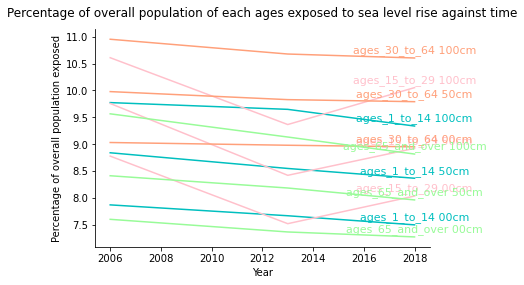

Horizons


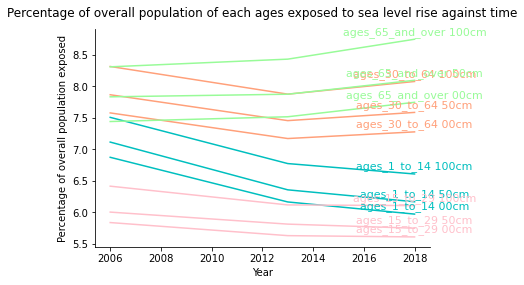

<Figure size 432x288 with 0 Axes>

In [22]:
#time progression - age

for rc in rc_names:
    print(rc)
    '''collate relevent data'''
    v_ages_1_to_14_06 = [regional_dict[rc]['slr_{}'.format(i)]['C06_Agelif'] for i in range(0,160,10)]
    v_ages_1_to_14_13 = [regional_dict[rc]['slr_{}'.format(i)]['C13_Agelif'] for i in range(0,160,10)]
    v_ages_1_to_14_18 = [regional_dict[rc]['slr_{}'.format(i)]['C18_Agelif'] for i in range(0,160,10)]
    v_ages_15_to_29_06 = [regional_dict[rc]['slr_{}'.format(i)]['C06_Agel_1'] for i in range(0,160,10)]
    v_ages_15_to_29_13 = [regional_dict[rc]['slr_{}'.format(i)]['C13_Agel_1'] for i in range(0,160,10)]
    v_ages_15_to_29_18 = [regional_dict[rc]['slr_{}'.format(i)]['C18_Agel_1'] for i in range(0,160,10)]
    v_ages_30_to_64_06 = [regional_dict[rc]['slr_{}'.format(i)]['C06_Agel_2'] for i in range(0,160,10)]
    v_ages_30_to_64_13 = [regional_dict[rc]['slr_{}'.format(i)]['C13_Agel_2'] for i in range(0,160,10)]
    v_ages_30_to_64_18 = [regional_dict[rc]['slr_{}'.format(i)]['C18_Agel_2'] for i in range(0,160,10)]
    v_ages_65_and_over_06 = [regional_dict[rc]['slr_{}'.format(i)]['C06_Agel_3'] for i in range(0,160,10)]
    v_ages_65_and_over_13 = [regional_dict[rc]['slr_{}'.format(i)]['C13_Agel_3'] for i in range(0,160,10)]
    v_ages_65_and_over_18 = [regional_dict[rc]['slr_{}'.format(i)]['C18_Agel_3'] for i in range(0,160,10)]


    total_06 = [sum(x) for x in zip(v_ages_1_to_14_06, v_ages_15_to_29_06,  v_ages_30_to_64_06,   v_ages_65_and_over_06)]
    total_13 = [sum(x) for x in zip(v_ages_1_to_14_13, v_ages_15_to_29_13,  v_ages_30_to_64_13,   v_ages_65_and_over_06)]
    total_18 = [sum(x) for x in zip(v_ages_1_to_14_18, v_ages_15_to_29_18,  v_ages_30_to_64_18,  v_ages_65_and_over_06)]


    p_ages_1_to_14_06 = [((x/y)*100) for x, y in zip(v_ages_1_to_14_06, total_06)]
    p_ages_1_to_14_13 = [((x/y)*100) for x, y in zip(v_ages_1_to_14_13, total_13)]
    p_ages_1_to_14_18 = [((x/y)*100) for x, y in zip(v_ages_1_to_14_18, total_18)]
    p_ages_15_to_29_06 = [((x/y)*100) for x, y in zip(v_ages_15_to_29_06, total_06)]
    p_ages_15_to_29_13 = [((x/y)*100) for x, y in zip(v_ages_15_to_29_13, total_13)]
    p_ages_15_to_29_18 = [((x/y)*100) for x, y in zip(v_ages_15_to_29_18, total_18)]
    r_ages_1_to_14_06 = [regional_noslr_dict[rc]['C06_Agelif'] for i in range(0, 160, 10)]
    r_ages_1_to_14_13 = [regional_noslr_dict[rc]['C13_Agelif'] for i in range(0, 160, 10)]
    r_ages_1_to_14_18 = [regional_noslr_dict[rc]['C18_Agelif'] for i in range(0, 160, 10)]
    r_ages_15_to_29_06 = [regional_noslr_dict[rc]['C06_Agel_1'] for i in range(0, 160, 10)]
    r_ages_15_to_29_13 = [regional_noslr_dict[rc]['C13_Agel_1'] for i in range(0, 160, 10)]
    r_ages_15_to_29_18 = [regional_noslr_dict[rc]['C18_Agel_1'] for i in range(0, 160, 10)]
    po_ages_1_to_14_06 = [x/(y/100) for x, y in zip(v_ages_1_to_14_06, r_ages_1_to_14_06)]
    po_ages_1_to_14_13 = [x/(y/100) for x, y in zip(v_ages_1_to_14_13, r_ages_1_to_14_13)]
    po_ages_1_to_14_18 = [x/(y/100) for x, y in zip(v_ages_1_to_14_18, r_ages_1_to_14_18)]
    po_ages_15_to_29_06 = [x/(y/100) for x, y in zip(v_ages_15_to_29_06, r_ages_15_to_29_06)]
    po_ages_15_to_29_13 = [x/(y/100) for x, y in zip(v_ages_15_to_29_13, r_ages_15_to_29_13)]
    po_ages_15_to_29_18 = [x/(y/100) for x, y in zip(v_ages_15_to_29_18, r_ages_15_to_29_18)]
    p_ages_30_to_64_06 = [((x/y)*100) for x, y in zip(v_ages_30_to_64_06, total_06)]
    p_ages_30_to_64_13 = [((x/y)*100) for x, y in zip(v_ages_30_to_64_13, total_13)]
    p_ages_30_to_64_18 = [((x/y)*100) for x, y in zip(v_ages_30_to_64_18, total_18)]
    p_ages_65_and_over_06 = [((x/y)*100) for x, y in zip(v_ages_65_and_over_06, total_06)]
    p_ages_65_and_over_13 = [((x/y)*100) for x, y in zip(v_ages_65_and_over_13, total_13)]
    p_ages_65_and_over_18 = [((x/y)*100) for x, y in zip(v_ages_65_and_over_18, total_18)]
    r_ages_30_to_64_06 = [regional_noslr_dict[rc]['C06_Agel_2'] for i in range(0, 160, 10)]
    r_ages_30_to_64_13 = [regional_noslr_dict[rc]['C13_Agel_2'] for i in range(0, 160, 10)]
    r_ages_30_to_64_18 = [regional_noslr_dict[rc]['C18_Agel_2'] for i in range(0, 160, 10)]
    r_ages_65_and_over_06 = [regional_noslr_dict[rc]['C06_Agel_3'] for i in range(0, 160, 10)]
    r_ages_65_and_over_13 = [regional_noslr_dict[rc]['C13_Agel_3'] for i in range(0, 160, 10)]
    r_ages_65_and_over_18 = [regional_noslr_dict[rc]['C18_Agel_3'] for i in range(0, 160, 10)]
    pc_ages_30_to_64_06 = [z-(x/((x+y)/100)) for x, y, z in zip(r_ages_30_to_64_06, r_ages_65_and_over_06, p_ages_30_to_64_06)]
    pc_ages_30_to_64_13 = [z-(x/((x+y)/100)) for x, y, z in zip(r_ages_30_to_64_13, r_ages_65_and_over_13, p_ages_30_to_64_13)]
    pc_ages_30_to_64_18 = [z-(x/((x+y)/100)) for x, y, z in zip(r_ages_30_to_64_18, r_ages_65_and_over_18, p_ages_30_to_64_18)]
    pc_ages_65_and_over_06 = [z-(x/((x+y)/100)) for x, y, z in zip(r_ages_65_and_over_06, r_ages_65_and_over_06, p_ages_65_and_over_06)]
    pc_ages_65_and_over_13 = [z-(x/((x+y)/100)) for x, y, z in zip(r_ages_65_and_over_13, r_ages_65_and_over_13, p_ages_65_and_over_13)]
    pc_ages_65_and_over_18 = [z-(x/((x+y)/100)) for x, y, z in zip(r_ages_65_and_over_18, r_ages_65_and_over_18, p_ages_65_and_over_18)]
    po_ages_30_to_64_06 = [x/(y/100) for x, y in zip(v_ages_30_to_64_06, r_ages_30_to_64_06)]
    po_ages_30_to_64_13 = [x/(y/100) for x, y in zip(v_ages_30_to_64_13, r_ages_30_to_64_13)]
    po_ages_30_to_64_18 = [x/(y/100) for x, y in zip(v_ages_30_to_64_18, r_ages_30_to_64_18)]
    po_ages_65_and_over_06 = [x/(y/100) for x, y in zip(v_ages_65_and_over_06, r_ages_65_and_over_06)]
    po_ages_65_and_over_13 = [x/(y/100) for x, y in zip(v_ages_65_and_over_13, r_ages_65_and_over_13)]
    po_ages_65_and_over_18 = [x/(y/100) for x, y in zip(v_ages_65_and_over_18, r_ages_65_and_over_18)]

    '''ages_1_to_14'''
    v_ages_1_to_14_dict_time = {}
    p_ages_1_to_14_dict_time = {}
    po_ages_1_to_14_dict_time = {}

    if rc == 'otago':
        rc = 'otago   '

    v_ages_1_to_14_df = pd.DataFrame({'years' : years})
    v_ages_1_to_14_df.columns.name = rc
    p_ages_1_to_14_df = pd.DataFrame({'years' : years})
    p_ages_1_to_14_df.columns.name = rc
    po_ages_1_to_14_df = pd.DataFrame({'years' : years})
    po_ages_1_to_14_df.columns.name = rc

    for i in range(0, 16, 1):
        v_ages_1_to_14_time = []
        v_ages_1_to_14_time.append(v_ages_1_to_14_06[i])
        v_ages_1_to_14_time.append(v_ages_1_to_14_13[i])
        v_ages_1_to_14_time.append(v_ages_1_to_14_18[i])
        v_ages_1_to_14_dict_time.update({'slr_{}0'.format(i) : v_ages_1_to_14_time})
        p_ages_1_to_14_time = []
        p_ages_1_to_14_time.append(p_ages_1_to_14_06[i])
        p_ages_1_to_14_time.append(p_ages_1_to_14_13[i])
        p_ages_1_to_14_time.append(p_ages_1_to_14_18[i])
        p_ages_1_to_14_dict_time.update({'slr_{}0'.format(i) : p_ages_1_to_14_time})
        po_ages_1_to_14_time = []
        po_ages_1_to_14_time.append(po_ages_1_to_14_06[i])
        po_ages_1_to_14_time.append(po_ages_1_to_14_13[i])
        po_ages_1_to_14_time.append(po_ages_1_to_14_18[i])
        po_ages_1_to_14_dict_time.update({'slr_{}0'.format(i) : po_ages_1_to_14_time})
        if i == 0 or i == 5 or i == 10:
            v_ages_1_to_14_df['slr_{}0'.format(i)] = v_ages_1_to_14_time
            po_ages_1_to_14_df['slr_{}0'.format(i)] = [round(num, 1) for num in po_ages_1_to_14_time]


    '''ages_15_to_29'''
    v_ages_15_to_29_dict_time = {}
    p_ages_15_to_29_dict_time = {}
    po_ages_15_to_29_dict_time = {}

    if rc == 'otago':
        rc = 'otago   '

    v_ages_15_to_29_df = pd.DataFrame({'years' : years})
    v_ages_15_to_29_df.columns.name = rc
    po_ages_15_to_29_df = pd.DataFrame({'years' : years})
    po_ages_15_to_29_df.columns.name = rc

    for i in range(0, 16, 1):
        v_ages_15_to_29_time = []
        v_ages_15_to_29_time.append(v_ages_15_to_29_06[i])
        v_ages_15_to_29_time.append(v_ages_15_to_29_13[i])
        v_ages_15_to_29_time.append(v_ages_15_to_29_18[i])
        v_ages_15_to_29_dict_time.update({'slr_{}0'.format(i) : v_ages_15_to_29_time})
        p_ages_15_to_29_time = []
        p_ages_15_to_29_time.append(p_ages_15_to_29_06[i])
        p_ages_15_to_29_time.append(p_ages_15_to_29_13[i])
        p_ages_15_to_29_time.append(p_ages_15_to_29_18[i])
        p_ages_15_to_29_dict_time.update({'slr_{}0'.format(i) : p_ages_15_to_29_time})
        po_ages_15_to_29_time = []
        po_ages_15_to_29_time.append(po_ages_15_to_29_06[i])
        po_ages_15_to_29_time.append(po_ages_15_to_29_13[i])
        po_ages_15_to_29_time.append(po_ages_15_to_29_18[i])
        po_ages_15_to_29_dict_time.update({'slr_{}0'.format(i) : po_ages_15_to_29_time})
        if i == 0 or i == 5 or i == 10:
            v_ages_15_to_29_df['slr_{}0'.format(i)] = v_ages_15_to_29_time
            po_ages_15_to_29_df['slr_{}0'.format(i)] = [round(num, 1) for num in po_ages_15_to_29_time]

    '''ages_30_to_64'''
    v_ages_30_to_64_dict_time = {}
    p_ages_30_to_64_dict_time = {}
    pc_ages_30_to_64_dict_time = {}
    po_ages_30_to_64_dict_time = {}

    if rc == 'otago':
        rc = 'otago   '

    v_ages_30_to_64_df = pd.DataFrame({'years' : years})
    v_ages_30_to_64_df.columns.name = rc
    p_ages_30_to_64_df = pd.DataFrame({'years' : years})
    p_ages_30_to_64_df.columns.name = rc
    pc_ages_30_to_64_df = pd.DataFrame({'years' : years})
    pc_ages_30_to_64_df.columns.name = rc
    po_ages_30_to_64_df = pd.DataFrame({'years' : years})
    po_ages_30_to_64_df.columns.name = rc

    for i in range(0, 16, 1):
        v_ages_30_to_64_time = []
        v_ages_30_to_64_time.append(v_ages_30_to_64_06[i])
        v_ages_30_to_64_time.append(v_ages_30_to_64_13[i])
        v_ages_30_to_64_time.append(v_ages_30_to_64_18[i])
        v_ages_30_to_64_dict_time.update({'slr_{}0'.format(i) : v_ages_30_to_64_time})
        p_ages_30_to_64_time = []
        p_ages_30_to_64_time.append(p_ages_30_to_64_06[i])
        p_ages_30_to_64_time.append(p_ages_30_to_64_13[i])
        p_ages_30_to_64_time.append(p_ages_30_to_64_18[i])
        p_ages_30_to_64_dict_time.update({'slr_{}0'.format(i) : p_ages_30_to_64_time})
        po_ages_30_to_64_time = []
        po_ages_30_to_64_time.append(po_ages_30_to_64_06[i])
        po_ages_30_to_64_time.append(po_ages_30_to_64_13[i])
        po_ages_30_to_64_time.append(po_ages_30_to_64_18[i])
        po_ages_30_to_64_dict_time.update({'slr_{}0'.format(i) : po_ages_30_to_64_time})
        if i == 0 or i == 5 or i == 10:
            v_ages_30_to_64_df['slr_{}0'.format(i)] = v_ages_30_to_64_time
            po_ages_30_to_64_df['slr_{}0'.format(i)] = [round(num, 1) for num in po_ages_30_to_64_time]


    '''ages_65_and_over'''
    v_ages_65_and_over_dict_time = {}
    p_ages_65_and_over_dict_time = {}
    pc_ages_65_and_over_dict_time = {}
    po_ages_65_and_over_dict_time = {}

    if rc == 'otago':
        rc = 'otago   '

    v_ages_65_and_over_df = pd.DataFrame({'years' : years})
    v_ages_65_and_over_df.columns.name = rc
    po_ages_65_and_over_df = pd.DataFrame({'years' : years})
    po_ages_65_and_over_df.columns.name = rc

    for i in range(0, 16, 1):
        v_ages_65_and_over_time = []
        v_ages_65_and_over_time.append(v_ages_65_and_over_06[i])
        v_ages_65_and_over_time.append(v_ages_65_and_over_13[i])
        v_ages_65_and_over_time.append(v_ages_65_and_over_18[i])
        v_ages_65_and_over_dict_time.update({'slr_{}0'.format(i) : v_ages_65_and_over_time})
        p_ages_65_and_over_time = []
        p_ages_65_and_over_time.append(p_ages_65_and_over_06[i])
        p_ages_65_and_over_time.append(p_ages_65_and_over_13[i])
        p_ages_65_and_over_time.append(p_ages_65_and_over_18[i])
        p_ages_65_and_over_dict_time.update({'slr_{}0'.format(i) : p_ages_65_and_over_time})
        po_ages_65_and_over_time = []
        po_ages_65_and_over_time.append(po_ages_65_and_over_06[i])
        po_ages_65_and_over_time.append(po_ages_65_and_over_13[i])
        po_ages_65_and_over_time.append(po_ages_65_and_over_18[i])
        po_ages_65_and_over_dict_time.update({'slr_{}0'.format(i) : po_ages_65_and_over_time})
        if i == 0 or i == 5 or i == 10:
            v_ages_65_and_over_df['slr_{}0'.format(i)] = v_ages_65_and_over_time
            po_ages_65_and_over_df['slr_{}0'.format(i)] = [round(num, 1) for num in po_ages_65_and_over_time]


    '''values and percentage of overall in table'''
    '''ages_15_to_29_all_df = pd.concat([v_ages_1_to_14_df, po_ages_1_to_14_df ], axis=1)
    ages_1_to_14_all_df = pd.concat([v_ages_15_to_29_df, po_ages_15_to_29_df ], axis=1)

    ages_15_to_29_all_df.loc[-1] = [rc, '', '', '', '', '', '']
    ages_15_to_29_all_df.index = ages_15_to_29_all_df.index + 1
    ages_15_to_29_all_df.sort_index(inplace=True)
    ages_15_to_29_all_df.to_csv('results/ages_time/' + rc + '_overseas.csv', mode='a')
    ages_1_to_14_all_df.loc[-1] = [rc, '', '', '', '', '', '']
    ages_1_to_14_all_df.index = ages_1_to_14_all_df.index + 1
    ages_1_to_14_all_df.sort_index(inplace=True)
    ages_1_to_14_all_df.to_csv('results/ages_time/' + rc +  '_ages_1_to_14.csv', mode='a')
    print(ages_15_to_29_all_df)
    print(ages_1_to_14_all_df)'''

    '''make all this data useful and orderly'''
    ages_dict_time = {'ages_1_to_14_value' : v_ages_1_to_14_dict_time, 'ages_1_to_14_percentage' : p_ages_1_to_14_dict_time, 'ages_1_to_14_po' : po_ages_1_to_14_dict_time, 'ages_15_to_29_value' : v_ages_15_to_29_dict_time, 'ages_15_to_29_percentage' : p_ages_15_to_29_dict_time, 'ages_15_to_29_po' : po_ages_15_to_29_dict_time}
    years = [2006, 2013, 2018]
    title_offset = 1.03

    '''ages_30_to_64_all_df = pd.concat([v_ages_30_to_64_df, po_ages_30_to_64_df ], axis=1)
    ages_65_and_over_all_df = pd.concat([v_ages_65_and_over_df, po_ages_65_and_over_df ], axis=1)
    ages_30_to_64_all_df.loc[-1] = [rc, '', '', '', '', '', '']
    ages_30_to_64_all_df.index = ages_30_to_64_all_df.index + 1
    ages_30_to_64_all_df.sort_index(inplace=True)
    ages_30_to_64_all_df.to_csv('results/ages_time/' + rc + '_ages.csv', mode='a')
    ages_65_and_over_all_df = pd.concat([vs_mal_df_all, pos_mal_df_all], axis=1)
    ages_65_and_over_all_df.loc[-1] = [rc, '', '', '', '', '', '']
    ages_65_and_over_all_df.index = ages_65_and_over_all_df.index + 1
    ages_65_and_over_all_df.sort_index(inplace=True)
    ages_65_and_over_all_df.to_csv('results/ages_time/' + rc +  '_nodescent.csv', mode='a')
    print(ages_30_to_64_all_df)
    print(ages_30_to_64_all_df)'''


    '''make all this data useful and orderly'''
    ages_dict_time = {'ages_1_to_14_value' : v_ages_1_to_14_dict_time, 'ages_1_to_14_percentage' : p_ages_1_to_14_dict_time, 'ages_1_to_14_po' : po_ages_1_to_14_dict_time, 'ages_15_to_29_value' : v_ages_15_to_29_dict_time, 'ages_15_to_29_percentage' : p_ages_15_to_29_dict_time, 'ages_15_to_29_po' : po_ages_15_to_29_dict_time, 'ages_30_to_64_value' : v_ages_30_to_64_dict_time, 'ages_30_to_64_percentage' : p_ages_30_to_64_dict_time, 'ages_30_to_64_po' : po_ages_30_to_64_dict_time, 'ages_65_and_over_value' : v_ages_65_and_over_dict_time, 'ages_65_and_over_percentage' : p_ages_65_and_over_dict_time, 'ages_65_and_over_po' : po_ages_65_and_over_dict_time}
    years = [2006, 2013, 2018]
    title_offset = 1.03
    colour_3 = 'lightsalmon'
    colour_4 = 'palegreen'
    shift_1 = (0,5)
    shift_2 = (0, 5)
    



    '''plot slr increase percentage of overall population'''
    for i in range(0, 11, 5):
        x = 'slr_'+ str(i) + '0'
        y = "ages_1_to_14 " + str(i) + "0cm"
        plt.plot(years, ages_dict_time['ages_1_to_14_po'][x], label=y, color="c")
        plt.annotate(y, (2018, ages_dict_time['ages_1_to_14_po'][x][2]), textcoords="offset points", xytext=shift_2, fontsize=11, ha='center', color='c')
    for i in range(0, 11, 5):
        x = 'slr_'+ str(i) + '0'
        y = "ages_15_to_29 " + str(i) + "0cm"
        plt.plot(years, ages_dict_time['ages_15_to_29_po'][x], label=y, color="pink")
        plt.annotate(y, (2018, ages_dict_time['ages_15_to_29_po'][x][2]), textcoords="offset points", xytext=shift_1, fontsize=11, ha='center', color='pink')
    for i in range(0, 11, 5):
        x = 'slr_'+ str(i) + '0'
        y = "ages_30_to_64 " + str(i) + "0cm"
        plt.plot(years, ages_dict_time['ages_30_to_64_po'][x], label=y, color=colour_3)
        plt.annotate(y, (2018, ages_dict_time['ages_30_to_64_po'][x][2]), textcoords="offset points", xytext=shift_1, fontsize=11, ha='center', color=colour_3)
    for i in range(0, 11, 5):
        x = 'slr_'+ str(i) + '0'
        y = "ages_65_and_over " + str(i) + "0cm"
        plt.plot(years, ages_dict_time['ages_65_and_over_po'][x], label=y, color=colour_4)
        plt.annotate(y, (2018, ages_dict_time['ages_65_and_over_po'][x][2]), textcoords="offset points", xytext=shift_2, fontsize=11, ha='center', color=colour_4)

        plt.xlabel('Year')
        plt.ylabel('Percentage of overall population exposed')
        plt.title('Percentage of overall population of each ages exposed to sea level rise against time', y=title_offset)
        ax = plt.subplot(111)
        ax.spines["right"].set_visible(False)
        ax.spines["top"].set_visible(False)
    plt.savefig('results/age_time/' + rc + '_percentageoverall_ages.png')
    plt.show()
    plt.clf()